In [1]:
# CMIP 6 
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from netCDF4 import Dataset
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
#from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import stats
import gc
from scipy.stats import sem

AOD=[]
import xarray as xr
os.chdir("/home/ybh10/Scripts/")

from my_functions import *
os.chdir("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/")

vn1=xr.open_dataset('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/DMS/dms_AERmon_UKESM1-0-LL_historical_r10i1p1f2_gn_185001-189912.nc')
lats=vn1.lat
lons=vn1.lon
time=vn1.time

DMS_ppt=((29/62.13)*1e12)
ODMS_nm=1e6
ODMS_nm_nor=1e9
#ODMS_trill=1e12
#ODMS_ppt=(((18/62.13)*1e12))
O3_ppm=((29/48)*1e6)
years=np.arange(1850,2015,1)
years_ozone=np.arange(1940,2015,1)
direct_season_SON='SON'
Seasons=['SON','DJF']
Direct_variables_of_interest=['Oceanic_DMS','DMS','Ozone_Column','uas']
Indirect_variables_of_interest=['AOD','DMS','Sea_Ice','SSA_MMR','uas','DMS_SSA']
models=['UKESM1','BCC','CESM2-WACCM','GFDL-CM4','GISS-E2-1-G','HadGEM3','MIROC-ES2L','MPI','MRI-ESM2-0','NorESM2-LM','GFDL-ESM4','CESM2_']
direct_models=['UKESM1','NorESM2-LM','MIROC-ES2L']

#Indirect_variables_of_interest=['UKESM1','BCC','CESM2-WACCM','GFDL-CM4','GISS-E2-1-G','HadGEM3','MIROC-ES2L','MPI','MRI-ESM2-0','NorESM2-LM','GFDL-ESM4','CESM2_']
ppt=[ODMS_nm,DMS_ppt,1,1,1]
ppt_indirect=[1,DMS_ppt,1,1,1,1]

ODMS_direct_SON=[];DMS_direct_SON=[]; Ozone_Column_direct_SON=[];uas_direct_SON=[]
direct_data_SON=[ODMS_direct_SON,DMS_direct_SON,Ozone_Column_direct_SON,uas_direct_SON]

ODMS_direct_DJF=[];DMS_direct_DJF=[]; Ozone_Column_direct_DJF=[]; uas_direct_DJF=[]
direct_data_DJF=[ODMS_direct_DJF,DMS_direct_DJF,Ozone_Column_direct_DJF,uas_direct_DJF]

SON_direct_data_ensemble=[]
DJF_direct_data_ensemble=[]
# SON_Direct_Data=[]
# DJF_Direct_Data=[]
# Seasons_Direct_Data=[SON_Direct_Data,DJF_Direct_Data]
######################################################################################
################################## DIRECT VARIABLES ##################################
######################################################################################
i=0
m=0
for Season in (Seasons):
     for data_type,data_input_son,data_input_djf in zip(Direct_variables_of_interest,direct_data_SON,direct_data_DJF):
        directory_path='/home/ybh10/CMIP6/Direct/{}/Processed/{}'.format(data_type,Season)
        file_load=np.load('{}/{}_{}_model_mean.npy'.format(directory_path,data_type,Season))
        #multi_file_load=np.load('{}/RAW/{}_{}_DATA.npy'.format(directory_path,data_type,direct_season_SON))
        data=np.squeeze(file_load)
        data_mean=np.nanmean(data,axis=0)
        print('loading {} onto the datarray.... np.shape({})'.format(data_type,np.squeeze(np.shape(data_mean))))
   #     data_input.append(data_mean)
        if Season == 'SON':
            SON_direct_data_ensemble.append(file_load*ppt[i])
            i=i+1

        if Season == 'DJF':
            DJF_direct_data_ensemble.append(file_load*ppt[m])
            m=m+1
SON_direct_data_ensemble[0][1]=(SON_direct_data_ensemble[0][1]*1e3)
DJF_direct_data_ensemble[0][1]=(DJF_direct_data_ensemble[0][1]*1e3)

SON_direct_data_ensemble=np.array(SON_direct_data_ensemble)
DJF_direct_data_ensemble=np.array(DJF_direct_data_ensemble)
    #seasons_data.append(data_input)
#direct_data=np.squeeze(direct_data)

######################################################################################
################################## INDIRECT VARIABLES ##################################
######################################################################################

SON_indirect_data_ensemble=[]
DJF_indirect_data_ensemble=[]
# SON_Direct_Data=[]
# DJF_Direct_Data=[]
# Seasons_Direct_Data=[SON_Direct_Data,DJF_Direct_Data]
i=0
m=0
for Season in (Seasons):
    for data_type in (Indirect_variables_of_interest):
        directory_path='/home/ybh10/CMIP6/Indirect/{}/Processed/{}'.format(data_type,Season)
        file_load=np.load('{}/{}_{}_model_mean.npy'.format(directory_path,data_type,Season))
        #multi_file_load=np.load('{}/RAW/{}_{}_DATA.npy'.format(directory_path,data_type,direct_season_SON))
        data=np.squeeze(file_load)
        data_mean=np.nanmean(data,axis=0)
        print('loading {} onto the datarray.... np.shape({})'.format(data_type,np.squeeze(np.shape(data_mean))))
        if Season == 'SON':
            SON_indirect_data_ensemble.append(file_load*ppt_indirect[i])
            i=i+1
            #data_input_son.append(data_mean)
        if Season == 'DJF':
            DJF_indirect_data_ensemble.append(file_load*ppt_indirect[m])
            print('m={}'.format(m))
            m=m+1
#data_input_djf.append(data_mean)

    #seasons_data.append(data_input)
#direct_data=np.squeeze(direct_data)

SON_indirect_data_ensemble=np.array(SON_indirect_data_ensemble)
DJF_indirect_data_ensemble=np.array(DJF_indirect_data_ensemble)

################################################################
######################## DMS / SSA Code ########################
################################################################

# dms_ssa_djf=np.empty((12, 75, 144,192)); dms_ssa_djf[:]=np.nan
# dms_ssa_son=np.empty((12, 75, 144,192)); dms_ssa_son[:]=np.nan

# for n in range(0,12):
#     for i in range(0,75):
#         for lo in range(0,144):
#             for la in range(0,192):
#                 dms_ssa_djf[n,i,lo,la]=DJF_indirect_data_ensemble[1][n,i,lo,la]/DJF_indirect_data_ensemble[3][n,i,lo,la]
#                 dms_ssa_son[n,i,lo,la]=SON_indirect_data_ensemble[1][n,i,lo,la]/SON_indirect_data_ensemble[3][n,i,lo,la]

#     print(np.nanmean(dms_ssa_djf))
# daty=[dms_ssa_son,dms_ssa_djf]
# # SON_indirect_data_ensemble.append(dms_ssa_son)
# # DJF_indirect_data_ensemble.append(dms_ssa_djf)
# for season,dats in zip(Seasons,daty):
#     np.save('/home/ybh10/CMIP6/Indirect/DMS_SSA/Processed/{}/DMS_SSA_{}_model_mean.npy'.format(season,season),dats)

################################################################
################################################################
################################################################

HAD_data=xr.open_dataset('/home/ybh10/Observational_Data/HAD_ICE/regrid-HadISST_ice.nc').sea_ice_area_fraction
HAD_lat=HAD_data.lat.data
HAD_lon=HAD_data.lon.data
HAD_old=HAD_data[840:1079].groupby('time.season').mean()*100
HAD_new=HAD_data[1500:].groupby('time.season').mean()*100
hadvar_old = np.where(HAD_old==0,np.nan,HAD_old)#mask sea ice
hadvar_new = np.where(HAD_new==0,np.nan,HAD_new)#mask sea ice
HAD_diff=hadvar_new-hadvar_old
Had_Diff=HAD_new-HAD_old
gc.collect()

def standard(data):
    serror=sem(data)
    pos_err=data+serror
    neg_err=data-serror
    if np.ndim(data)==2 !=-1:
        positive=np.nanmean(pos_err,axis=0)
        negative=np.nanmean(neg_err,axis=0)
    return positive, negative

def CMIP6(regional,globe,dms_PPT,array,global_array):  # This function will give me all seasons when specified the first and last!
    season=np.arange(0,len(regional),12)
    if (First)==11 !=-1: # Only activated when DJF seasonality is being used.
        for seas in (season):
            p=((globe[First+seas]))
            j=((globe[first1+seas]))
            i=((globe[Last+seas]))
            globally=np.nanmean((p,j,i))
            global_array.append(globally)
    else: # Activated when MAM, JA, SON is being created.
        for seas in (season):
                regionally=(np.nanmean(regional[First+seas:Last+seas],axis=0)*dms_PPT)
                globally=(np.nanmean(globe[First+seas:Last+seas],axis=0)*dms_PPT)
                array.append(regionally)
                global_array.append(globally)
    return array,global_array

<ipython-input-1-2b508ef51096>:76: RuntimeWarning: Mean of empty slice
  data_mean=np.nanmean(data,axis=0)


loading Oceanic_DMS onto the datarray.... np.shape([ 75 144 192])
loading DMS onto the datarray.... np.shape([ 75 144 192])
loading Ozone_Column onto the datarray.... np.shape([ 75 144 192])
loading uas onto the datarray.... np.shape([ 75 144 192])
loading Oceanic_DMS onto the datarray.... np.shape([ 75 144 192])
loading DMS onto the datarray.... np.shape([ 75 144 192])
loading Ozone_Column onto the datarray.... np.shape([ 75 144 192])
loading uas onto the datarray.... np.shape([ 75 144 192])


<ipython-input-1-2b508ef51096>:89: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  SON_direct_data_ensemble=np.array(SON_direct_data_ensemble)
<ipython-input-1-2b508ef51096>:90: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  DJF_direct_data_ensemble=np.array(DJF_direct_data_ensemble)


loading AOD onto the datarray.... np.shape([ 75 144 192])
loading DMS onto the datarray.... np.shape([ 75 144 192])
loading Sea_Ice onto the datarray.... np.shape([ 75 144 192])
loading SSA_MMR onto the datarray.... np.shape([ 75 144 192])
loading uas onto the datarray.... np.shape([ 75 144 192])
loading DMS_SSA onto the datarray.... np.shape([ 75 144 192])
loading AOD onto the datarray.... np.shape([ 75 144 192])
m=0
loading DMS onto the datarray.... np.shape([ 75 144 192])
m=1
loading Sea_Ice onto the datarray.... np.shape([ 75 144 192])
m=2
loading SSA_MMR onto the datarray.... np.shape([ 75 144 192])
m=3
loading uas onto the datarray.... np.shape([ 75 144 192])
m=4
loading DMS_SSA onto the datarray.... np.shape([ 75 144 192])
m=5


/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [24]:
# ##########################################################################################################
# ######################################## RELATIVE PERCENTAGE #############################################
# ##########################################################################################################
import copy

dataset=[]

Direct_or_Indirect='Direct' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_in= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_in= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,len(nums),75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,len(data_in)):
        for i,l in zip(nums,range(0,len(nums))):
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
            if t == 0:
                print('models = {}'.format(models[i]))

        
for datas,variable_label in zip(data_in,variables_for_calculation):
    print(variable_label) # iterating through each variables in the loop.
    print(np.shape(datas))
    old_variable=np.nanmedian(datas[:,:21,:,:],axis=(0,1)) # Taking the mean for the 1940 - 60 climatology .
    vari=np.empty((65,144,192)); vari[:]=np.nan # creating empty array for data through from 1950 --> 2014(5)
    new_data=np.nanmedian(datas,axis=0)
    #data=np.nanmean(datas[num],axis=(0))
  #  for t in range(0,datas[num].shape[0]):
    for i in range(0,vari.shape[0]):
        for la in range(0,new_data.shape[1]):
            for lo in range(0,new_data.shape[2]):
                  #  print('hi')
                if variable_label == 'uas' !=-1:
                    vari[i,la,lo]=(new_data[i+10,la,lo]-old_variable[la,lo])
                else:
                    if variable_label == 'dms_ssa' !=-1:
                        vari[i,la,lo]=(new_data[i+10,la,lo]-old_variable[la,lo])
                    else:
                        vari[i,la,lo]=((new_data[i+10,la,lo]/old_variable[la,lo])-1)*100    
    dataset.append(vari)

# #np.save('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type),dataset)    

# # ##########################################################################################################
# # ######################################## Absolute Difference #############################################
# # ##########################################################################################################
# dataset_abs=[]
# # dataset=np.empty((4,3,65,144,192)); dataset[:]=np.nan # creating empty array for data through from 1950 --> 2014(5)


# for datas,variable_label in zip(data_in,variables_for_calculation):
#     print(variable_label) # iterating through each variables in the loop.
#     print(np.shape(datas))
#     old_variable=np.nanmean(datas[:,:21,:,:],axis=(0,1)) # Taking the mean for the 1940 - 60 climatology .
#     vari=np.empty((65,144,192)); vari[:]=np.nan # creating empty array for data through from 1950 --> 2014(5)
#     new_data=np.nanmean(datas,axis=0)
#     #data=np.nanmean(datas[num],axis=(0))
#   #  for t in range(0,datas[num].shape[0]):
#     for i in range(0,vari.shape[0]):
#         for la in range(0,new_data.shape[1]):
#             for lo in range(0,new_data.shape[2]):
#                   #  print('hi')
#                 if variable_label == 'uas' !=-1:
#                     vari[i,la,lo]=(new_data[i+10,la,lo]-old_variable[la,lo])
#                 else:
#                     if variable_label == 'dms_ssa' !=-1:
#                         vari[i,la,lo]=(new_data[i+10,la,lo]-old_variabdatle[la,lo])
#                     else:
#                         vari[i,la,lo]=(new_data[i+10,la,lo]-old_variable[la,lo])
#     dataset_abs.append(vari)
# #np.save('/home/ybh10/CMIP6/{}/Absolute_Difference_{}_Dataset_{}'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type),dataset_abs)    

# gc.collect()

Oceanic_DMS
(3, 75, 144, 192)
DMS
(3, 75, 144, 192)
Ozone_Column
(6, 75, 144, 192)
uas
(3, 75, 144, 192)


In [178]:
# ##########################################################################################################
# ######################################## RELATIVE PERCENTAGE #############################################
# ##########################################################################################################
# ######################################## PERCENTILES DATA  #############################################

import copy

directs=['Indirect','Indirect','Direct','Direct']
seasos=['DJF','SON','DJF']
for dirs, seas in zip(directs,seasos):
    Direct_or_Indirect= dirs ######## CHANGABLE ATTRIBUTION ########
    Season_type=seas           ######## CHANGABLE ATTRIBUTION ########
    dataset=[]


    if Direct_or_Indirect == 'Direct':
        variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
        if Season_type =='SON':
            data_in= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
        else:
            data_in= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
        if Season_type =='SON':
            data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
        else:
            data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
        nums=[0,1,3,5,7,8,9,10]
        data_in=np.zeros((6,len(nums),75,144,192)) ;  data_in[:]=np.nan
        model_var=[]
        for t in range(0,len(data_in)):
            for i,l in zip(nums,range(0,len(nums))):
                data_in[t,l]=data_for_calculations[t][i]
                model_var.append(models[i])
                if t == 0:
                    print('models = {}'.format(models[i]))

    PERCENTILE=84

#     for datas,variable_label in zip(data_in,variables_for_calculation):
#         print(variable_label) # iterating through each variables in the loop.
#         print(np.shape(datas))
#         old_variable=np.nanpercentile(datas[:,:21], PERCENTILE,axis=(0,1))
#         #old_variable=np.nanmedian(percentile_data[:21,:,:],axis=(0)) # Taking the mean for the 1940 - 60 climatology .
#         vari=np.empty((65,144,192)); vari[:]=np.nan # creating empty array for data through from 1950 --> 2014(5)
#         new_data=np.nanpercentile(datas, PERCENTILE,axis=(0))

#        # new_data=np.nanmedian(datas,axis=0)
#         #data=np.nanmean(datas[num],axis=(0))
#       #  for t in range(0,datas[num].shape[0]):
#         for i in range(0,vari.shape[0]):
#             for la in range(0,new_data.shape[1]):
#                 for lo in range(0,new_data.shape[2]):
#                       #  print('hi')
#                     if variable_label == 'uas' !=-1:
#                         vari[i,la,lo]=(new_data[i+10,la,lo]-old_variable[la,lo])
#                     else:
#                         if variable_label == 'dms_ssa' !=-1:
#                             vari[i,la,lo]=(new_data[i+10,la,lo]-old_variable[la,lo])
#                         else:
#                             vari[i,la,lo]=((new_data[i+10,la,lo]/old_variable[la,lo])-1)*100    
#         dataset.append(vari)

#     np.save('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}_MEDIAN_{}%'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type,PERCENTILE),dataset)    
    # ##########################################################################################################
    # ######################################## Absolute Difference #############################################
    # ##########################################################################################################
    dataset_abs=[]

    for datas,variable_label in zip(data_in,variables_for_calculation):
        print(variable_label) # iterating through each variables in the loop.
        print(np.shape(datas))
        old_variable=np.nanpercentile(datas[:,:21,:,:], PERCENTILE,axis=(0,1))
        #old_variable=np.nanmedian(percentile_data[:21,:,:],axis=(0)) # Taking the mean for the 1940 - 60 climatology .
        vari=np.empty((65,144,192)); vari[:]=np.nan # creating empty array for data through from 1950 --> 2014(5)
        new_data=np.nanpercentile(datas, PERCENTILE,axis=(0))

        #data=np.nanmean(datas[num],axis=(0))
      #  for t in range(0,datas[num].shape[0]):
        for i in range(0,vari.shape[0]):
            for la in range(0,new_data.shape[1]):
                for lo in range(0,new_data.shape[2]):
                      #  print('hi')
                    vari[i,la,lo]=((new_data[i+10,la,lo]-old_variable[la,lo]))    
        dataset_abs.append(vari)

    np.save('/home/ybh10/CMIP6/{}/Abs_Diff/Absolute_Difference_{}_Dataset_{}_MEDIAN_{}%'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type,PERCENTILE),dataset_abs)    

#     def find_diffs(run10,run1,axis1):
#         t = stats.ttest_ind(run10,run1,axis=axis1); tt=t[1]
#         diff = np.where(tt>0.05, 1, 0) #1 indicates it is not statistically significant; 0 indicates it is
#         return diff

#     spatial_dots=np.empty((len(data_in), 144,192)); spatial_dots[:]=np.nan
#     for i in range(0,len(data_in)):
#         print("Loading and mapping {} for Statistical Significance".format(variables_for_calculation[i]))
#         percentile_data=np.percentile(data_in[i], PERCENTILE,axis=0)
#         Post_Ozone=percentile_data[-21:]
#         Pre_Ozone=percentile_data[:21]
#         data_diff=find_diffs(Post_Ozone,Pre_Ozone,0)
#         spatial_dots[i,:,:]=(data_diff)
#     #data_dots=np.array(data_dots)

#     Zonal_dots=np.empty((len(data_in), 75, 144)); Zonal_dots[:]=np.nan

#     for var in range(0,len(data_in)):
#         print(variables_for_calculation[var])
#         for i in range(0,75):
#             Post_Ozone=np.nanpercentile(data_in[var], PERCENTILE,axis=0)
#     #        Post_Ozone=(np.nanmedian(data_in[var][:,:],axis=0))
#             percentile_data=np.nanpercentile(data_in[var][:,:21], PERCENTILE,axis=0)
#             Pre_Ozone=np.nanmedian(percentile_data,axis=(0))
#             data_diff=find_diffs(Post_Ozone[i],Pre_Ozone,1)
#             Zonal_dots[var,i]=(data_diff)
#     Zonal_dots=np.array(Zonal_dots)

#     np.save('/home/ybh10/CMIP6/{}/Dots/{}_Zonal_Dots_MEDIAN_{}%.npy'.format(Direct_or_Indirect,Season_type,PERCENTILE),Zonal_dots)
#     np.save('/home/ybh10/CMIP6/{}/Dots/{}_Spatial_Dots_MEDIAN_{}%.npy'.format(Direct_or_Indirect,Season_type,PERCENTILE),spatial_dots)

#     gc.collect()



models = UKESM1
models = BCC
models = GFDL-CM4
models = HadGEM3
models = MPI
models = MRI-ESM2-0
models = NorESM2-LM
models = GFDL-ESM4
AOD
(8, 75, 144, 192)


KeyboardInterrupt: 

In [262]:
######################## THIS CELL SORTS OUT THE STATISTICAL DOTS ON MAPS AND SAVES THEM #########
def find_diffs(run10,run1,axis1):
    t = stats.ttest_ind(run10,run1,axis=axis1); tt=t[1]
    diff = np.where(tt>0.05, 1, 0) #1 indicates it is not statistically significant; 0 indicates it is
    return diff

# olaty=np.nanmean(olat[0:138],axis=1)
# ocean_sw=djf_large_data[1][RSDO]
# #sea=np.nanmean(ocean_sw[:,100:165],axis=(0))
# old_sea=np.nanmean(ocean_sw[:,90:111,:,:],axis=(1)) # mean on 1940-1960
# sea_sw=find_diffs(old_sea,ocean_sw)
# #sea_sw=sea_sw.transpose(1,0)
#################################### I need to concentate DMS_SSA variable to the indirect variables.
# if Direct_or_Indirect == 'Indirect':
#     variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
#     if Season_type =='SON':
#         data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
#     else:
#         data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########

#np.save('')
################### STATISTICAL DOT CODE ##################
## Removing CESM and GISS from dataset ####


dataset=np.empty((4,3,65,144,192)); dataset[:]=np.nan # creating empty array for data through from 1950 --> 2014(5)

spatial_dots=np.empty((len(data_in),3, 144,192)); spatial_dots[:]=np.nan
for i in range(0,len(data_in)):
    for t in range(0,3):
        if i == 2:
            pass
        else:
            print("Loading and mapping {} for Statistical Significance".format(variables_for_calculation[i]))
            Post_Ozone=(data_in[i][t,-21:])
            Pre_Ozone=(data_in[i][t,:21])
            data_diff=find_diffs(Post_Ozone,Pre_Ozone,0)
            spatial_dots[i,t,:,:]=(data_diff)
#data_dots=np.array(data_dots)

# Zonal_dots=np.empty((len(data_in), 75, 144)); Zonal_dots[:]=np.nan

# for var in range(0,len(data_in)):
#     print(variables_for_calculation[var])
#     for i in range(0,75):
#         Post_Ozone=(np.nanmedian(data_in[var][:,:],axis=0))
#         Pre_Ozone=np.nanmedian(data_in[var][:,:21],axis=(0,1))
#         data_diff=find_diffs(Post_Ozone[i],Pre_Ozone,1)
#         Zonal_dots[var,i]=(data_diff)
# Zonal_dots=np.array(Zonal_dots)

# file = '/home/ybh10/CMIP6/{}'.format(Direct_or_Indirect)
# for i,model_names in zip(range(0,len(data_dots)),variables_for_calculation):
#     print("Saving {} for Statistical Significance".format(variables_for_calculation[i]))
#     print('within file: {}/{}/Processed/{}/{}_Dataset_{}_Dots.npy'.format(file,model_names,Season_type,Direct_or_Indirect,Season_type))
#     np.save(('{}/{}/Processed/{}/{}_Dataset_{}_Dots.npy'.format(file,model_names,Season_type,Direct_or_Indirect,Season_type)),data_dots[i])
# np.save('{}/{}_Dataset_Dots_{}.npy'.format(file,Direct_or_Indirect,Season_type),data_dots)



# for t in range (0,6):
#     aod_data=np.nanmean(data_for_calculations[t][:,55:,:48],axis=(1,2,3)) 
#     std=np.std(aod_data)
#     meaned=np.nanmean(aod_data)
#     upper_data=meaned+std
#     lower_data=meaned-std
#     print(Indirect_variables_of_interest[t])
#     for i in range(0,12):
#         print('{} = lower {:.4f} - mean {:.4f} - upper {:.4f}'.format(models[i],lower_data,aod_data[i],upper_data))
#     print('---------------------')


Loading and mapping Oceanic_DMS for Statistical Significance
Loading and mapping Oceanic_DMS for Statistical Significance
Loading and mapping Oceanic_DMS for Statistical Significance
Loading and mapping DMS for Statistical Significance
Loading and mapping DMS for Statistical Significance
Loading and mapping DMS for Statistical Significance
Loading and mapping uas for Statistical Significance
Loading and mapping uas for Statistical Significance
Loading and mapping uas for Statistical Significance


In [2]:

def shifty(variable_name,saves,season,shifty): # This definition matches my variables in the loop below (data_...).
    colour=[]
    if season == 'DJF': # assumes 2 seasons (DJF and SON maybe?)
        i=0
    else:
        i=1
    for meas in (variable_name): # Shifty is two seasons of shifted cmap (2,) with 13 values in each
        for save,cmap in zip(saves,shifty[i]):
            if save == meas !=-1:
#                 print(meas)
#                 print(save)
#                 print('-----------')
                colour.append(cmap)

    return colour
            
        

clevs_SON_Ozone=np.arange(-60,5+5,5)
clevs_SON_ODMS=np.arange(-30,30+5,5)
clevs_SON_Wind=np.arange(-.5,2,.25)
clevs_SON_DMS=np.arange(-40,40+5,5)
clevs_SON_AOD=np.arange(0,50+5,5)
clevs_SON_SO2=np.arange(-40,40+5,5)
clevs_SON_H2SO4MMR=np.arange(0,50+5,5)
clevs_SON_SSAMMR=np.arange(-5,75+5,5)
clevs_SON_SSA_H2SO4=np.arange(-60,60+5,5)
clevs_SON_RSS=np.arange(-5,40+2,2)
clevs_SON_RSDO=np.arange(-5,90+5,5)
clevs_SON_RSDS=np.arange(-10,6,2)
clevs_SON_RSDSCS=np.arange(-4,3+1,1)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_DMS = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_RSS = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_ODMS = shiftedColorMap(orig_cmap, start=.2,midpoint=0.45, stop=.75, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0.45,midpoint=0.18, stop=.9, name='shifted')
shifted_cmap_RSDSCS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.5, stop=.7, name='shifted')
shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.45, midpoint=0.25, stop=1, name='shifted')
shifted_cmap_Sea_Ice = 'viridis'
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
SON_clevy=[clevs_SON_AOD,clevs_SON_DMS,clevs_SON_ODMS,clevs_SON_Ozone,clevs_SON_RSDO,clevs_SON_RSDS,clevs_SON_RSS,clevs_SON_SO2,clevs_SON_SSAMMR,clevs_SON_H2SO4MMR,clevs_SON_RSDSCS,clevs_SON_SSA_H2SO4,clevs_SON_Wind]
SON_shift=[shifted_cmap_AOD,shifted_cmap_DMS,shifted_cmap_ODMS,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_SO2,shifted_cmap_SSAMMR,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_Sea_Ice,shifted_cmap_SSA_H2SO4,shifted_cmap_Wind]

clevs_DJF_DMS=np.arange(-70,65+10,10)
clevs_DJF_Ozone=np.arange(-60,5+5,5)
clevs_DJF_ODMS=np.arange(-50,50+5,5)
clevs_DJF_AOD=np.arange(-10,60+5,5)
clevs_DJF_SO2=np.arange(-20,60+5,5)
clevs_DJF_H2SO4MMR=np.arange(-10,50+5,5)
clevs_DJF_SSAMMR=np.arange(-20,60+5,5)
clevs_DJF_SSA_H2SO4=np.arange(-80,80+10,10)
clevs_DJF_SSA_H2SO4_ABS=np.arange(0,200+20,20)
clevs_DJF_RSDO=np.arange(-5,90+5,5)
clevs_DJF_RSDS=np.arange(-10,6,2)
clevs_DJF_RSDSCS=np.arange(-2,1+.2,.2)
clevs_DJF_RSS=np.arange(-10,30+5,5)
clevs_DJF_Wind=np.arange(-1.8,3.8,.45)

shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0.45,midpoint=0.18, stop=.9, name='shifted')
shifted_cmap_ODMS = shiftedColorMap(orig_cmap, start=.2,midpoint=0.45, stop=.75, name='shifted')
shifted_cmap_RSDSCS = shiftedColorMap(orig_cmap, start=0.25, midpoint=0.626, stop=.7, name='shifted')
shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.45, stop=1, name='shifted') 
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_SSA_H2SO4_ABS = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.7, stop=1, name='shifted')
shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.05, midpoint=0.44, stop=0.9, name='shifted')
shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.4, stop=1, name='shifted') 
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.4, stop=1, name='shifted') 
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_RSS = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
DJF_clevy=[clevs_DJF_AOD,clevs_DJF_DMS,clevs_DJF_ODMS,clevs_DJF_Ozone,clevs_DJF_RSDO,clevs_DJF_RSDS,clevs_DJF_RSS,clevs_DJF_SO2,clevs_DJF_SSAMMR,clevs_DJF_H2SO4MMR,clevs_DJF_RSDSCS,clevs_DJF_SSA_H2SO4,clevs_DJF_Wind]
DJF_shift=[shifted_cmap_AOD,shifted_cmap_DMS,shifted_cmap_ODMS,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_SO2,shifted_cmap_SSAMMR,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_Sea_Ice,shifted_cmap_SSA_H2SO4,shifted_cmap_Wind]

## Zonal
clevs_ozone=np.arange(-240,40,20) # Ozone
clevs_so2=np.arange(-3,3+.3,.3)
clevs_rsdscs=np.arange(-4,4+.5,.5)
clevs_rsdo=np.arange(-12,12+1,1)
clevs_h2so4=np.arange(-.5e11,1e11,0.1e10)
clevs_rsds=np.arange(-10,4+2,2) #DJF
clevs_rsds_son=np.arange(-14,6+2,2) # SON
clevs_wind=np.arange(-1.8,3.8,.45)# Wind
clevs_dms=np.arange(-32,24,4) # DMS
clevs_aod=np.arange(-0.005,0.035,0.0025) # AOD
clevs_odms=np.arange(-1,0.65,0.1) # DJF
clevs_odms_son=np.arange(-.5,0.35,0.05) # SON
clevs_aod=np.arange(-0.005,0.035,0.0025) # AOD

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.62, stop=1, name='shifted')
shifted_cmap_so2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.55, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.55, stop=.85, name='shifted')
DJF_shift=[shifted_cmap_AOD,shifted_cmap_DMS,shifted_cmap_ODMS,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_SO2,shifted_cmap_SSAMMR,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_Sea_Ice,shifted_cmap_SSA_H2SO4,shifted_cmap_Wind]

DJF_clevy_abs=[clevs_aod,clevs_dms,clevs_odms,clevs_ozone,clevs_rsdo,clevs_rsds,clevs_rsds,clevs_so2,clevs_so2,clevs_so2,clevs_rsdscs,clevs_so2,clevs_wind]
DJF_shift_abs=[shifted_cmap_aod,shifted_cmap_dms,shifted_cmap_odms,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_so2,shifted_cmap_ssa,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_H2SO4MMR,shifted_cmap_wind]
SON_clevy_abs=[clevs_aod,clevs_dms,clevs_odms_son,clevs_ozone,clevs_rsdo,clevs_rsds,clevs_rsds_son,clevs_so2,clevs_so2,clevs_so2,clevs_rsdscs,clevs_so2,clevs_wind]
SON_shift_abs=[shifted_cmap_aod,shifted_cmap_dms,shifted_cmap_odms,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_so2,shifted_cmap_ssa,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_H2SO4MMR,shifted_cmap_wind]



def data_for_figure (measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs):
    data_percentage=[]
    data_dot=[]
    data_clev=[]
    data_shift=[]
    for i in range(0,len(measurement)):
            a=np.load('{}{}.npy'.format(file,measurement[i]))
            b=np.load('{}{}.npy'.format(file_dot,measurement[i]))
            c=np.load('{}/Clevs/{}_clev.npy'.format(file,measurement[i])) #put these clevs in dictionary along with each measurement and dot.
            #s=np.load('{}{}_shift.npy'.format(file_clev,measurement[i]), allow_pickle=True) # put these clevs in dictionary along with each measurement and dot.
            data_percentage.append(a)
            data_dot.append(b)
            data_clev.append(c)
    #        data_shift.append(s)
    #shift_month=[DJF_shift,SON_shift]
    shift_month=[DJF_shift_abs,SON_shift_abs] # for abs zonal

    data_shift=shifty(measurement,saves,month,shift_month)
    return data_percentage, data_dot, data_clev,data_shift


def blank_space (variable,min,max): # This creates a WHITE space close to the 0 MARK in the colour map.
    vari=np.empty((np.shape(variable)[0],np.shape(variable)[1])); vari[:]=np.nan
    for latty in range(0,np.shape(variable)[0]):
        for lonny in range(0,np.shape(variable)[1]):                
            vari[latty,lonny]=(variable[latty,lonny])
            if variable[latty,lonny]>min:
    #print(ovar[latty,lonny])
                if variable[latty,lonny] <max :
                    vari[latty,lonny]=np.nan
#                 else:
#                     vari[latty,lonny]=(variable[latty,lonny])
#             else:
                
    return vari
def sea_ice_mask (sea_ice_data,data_2d,lat,lon,num):
    var = np.where(sea_ice_data>num,100000,data_2d)#mask sea ice
    data=np.empty((np.shape(data_2d)[0],np.shape(data_2d)[1])); data[:]=np.nan
    lat_data=np.empty((np.shape(data_2d)[0],np.shape(data_2d)[1])); data[:]=np.nan
    lon_data=np.empty((np.shape(data_2d)[0],np.shape(data_2d)[1])); data[:]=np.nan
    
    for xla in range(0,lat.shape[0]):
        for ylon in range(lon.shape[1]):
            if var[xla,ylon] > 90000:
                data[xla,ylon]=var[xla,ylon]
            else:
                data[xla,ylon]=np.nan
    return data

clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')
#sic=np.nanmean(sea_ice[90:111],axis=(0))
saves=['AOD','DMS','ODMS','Ozone','DMS_SSA','RSDO','RSDS','RSS','SO2','SSAMMR','H2SO4MMR','RSDSCS','SSA_H2SO4','Wind']


<ipython-input-38-3f8a3a7b051b>:126: UserWarning: The following kwargs were not used by contour: 'label'
  cs = axe.contourf(Dates,lat_sh,datas,clev_test,cmap=color,label=unit,extend='both')
<ipython-input-38-3f8a3a7b051b>:121: UserWarning: The following kwargs were not used by contour: 'label'
  cs = axe.contourf(Dates,lat_sh,datas*1e9,clevs_SSA,cmap=ssa_shift,label=unit,extend='both')


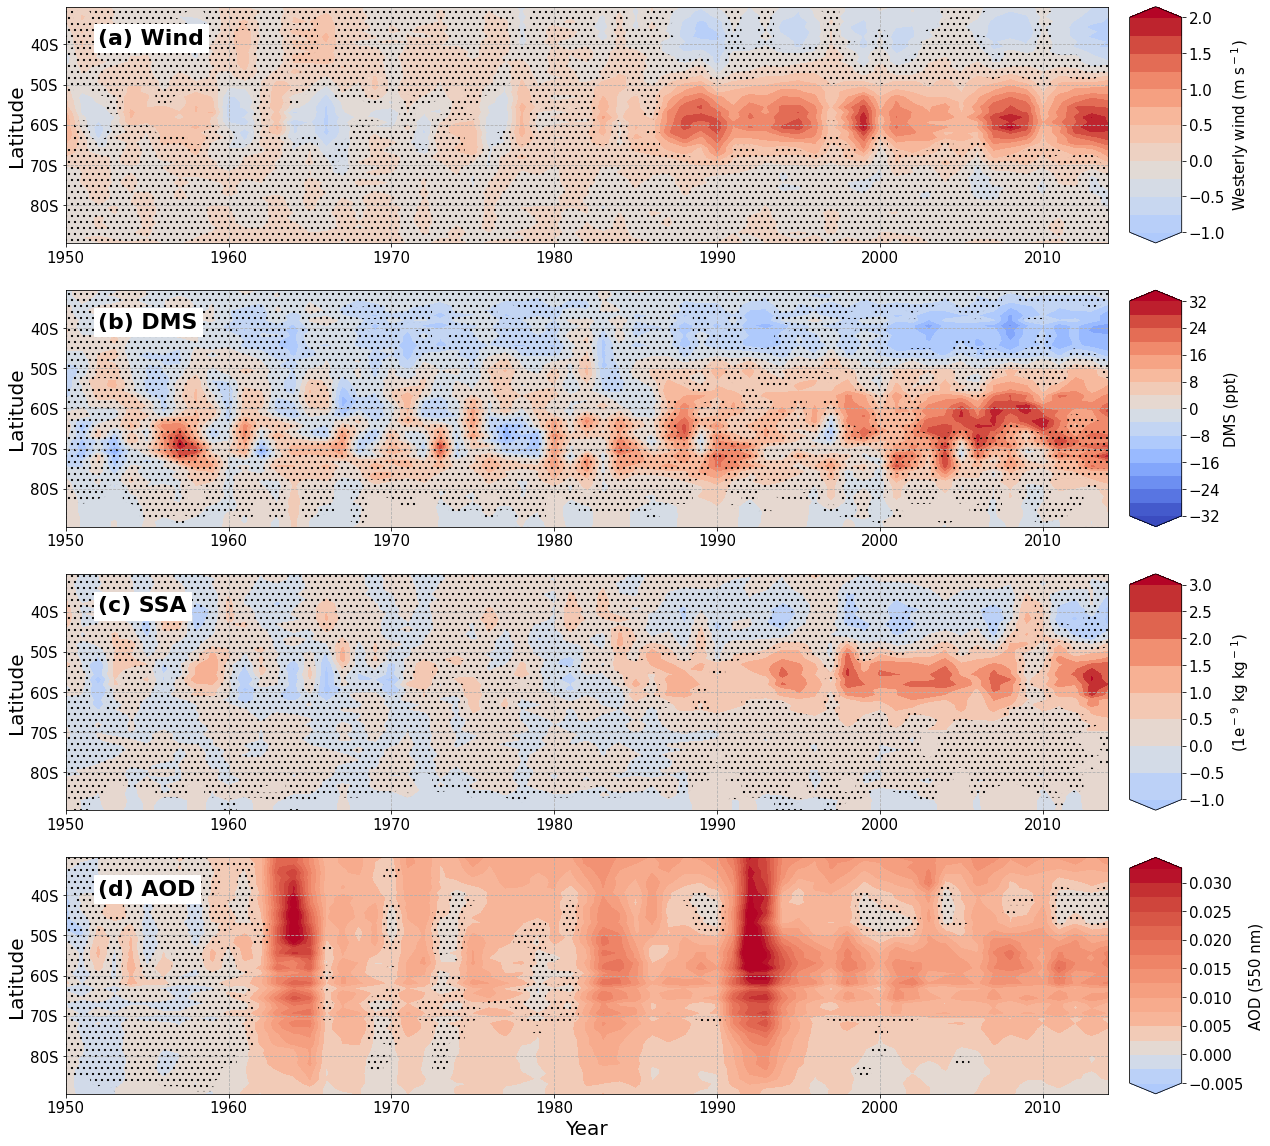

In [38]:
############################# FIGURE 1 ###################################

# -*- coding: utf-8 -*-
"""
Created on Wed Jun 10 13:34:01 2020
MODIFIED ON 01/03/22
@author: ybh10
"""
import copy
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

# s
dataset=[]

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,6):
        for i,l in zip(nums,range(0,8)):
            #print('models = {}'.format(models[i]))
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
            
measurement=['Wind','DMS','SSAMMR','AOD']
# data_percentage=[]
# data_dot=[]
data_clev=[]
data_shift=[]
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/DJF/'
saves=['AOD','DMS','ODMS','Ozone','RSDO','RSDS','RSS','SO2','SSAMMR','H2SO4MMR','RSDSCS','SSA_H2SO4','Wind']
month='DJF'
for i in range(0,len(measurement)):
#         a=np.load('{}{}.npy'.format(file,measurement[i]))
#         b=np.load('{}{}.npy'.format(file_dot,measurement[i]))
        c=np.load('{}/Clevs/{}_clev.npy'.format(file,measurement[i])) #put these clevs in dictionary along with each measurement and dot.
        #s=np.load('{}{}_shift.npy'.format(file_clev,measurement[i]), allow_pickle=True) # put these clevs in dictionary along with each measurement and dot.
#         data_percentage.append(a)
#         data_dot.append(b)
        data_clev.append(c)
# #        data_shift.append(s)
shift_month=[DJF_shift_abs,SON_shift_abs]
data_shift=shifty(measurement,saves,month,shift_month)

Indirect_variables_of_interest=['AOD','DMS','Sea_Ice','SSA_MMR','uas','DMS_SSA']
measurement=['Wind','DMS','SSA','AOD']
data_abs=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_DJF_MEDIAN.npy')
data_dot=np.load('/home/ybh10/CMIP6/Indirect/Dots/DJF_Zonal_Dots_MEDIAN.npy')

#data_abs=np.load('/home/ybh10/CMIP6/Indirect/Absolute_Difference_Indirect_Dataset_DJF.npy')
#data_dot=np.load('/home/ybh10/CMIP6/Indirect/DJF_Zonal_Dots.npy')
data_for_fig1=[data_abs[4],data_abs[1],data_abs[3],data_abs[0]] # 'Wind','DMS','SSA','AOD'
data_dots_for_fig1=[data_dot[4],data_dot[1],data_dot[3],data_dot[0]] # 'Wind','DMS','SSA','AOD'

lat_sh=lats[0:48]
fig = plt.figure(figsize=(20,20), edgecolor='w')
n=4
ax1 = fig.add_subplot(n,1,1); ax2 = fig.add_subplot(n,1,2); ax3 = fig.add_subplot(n,1,3);ax4 = fig.add_subplot(n,1,4)#;ax5 = fig.add_subplot(n,1,5);ax6 = fig.add_subplot(n,1,6)
axes=[ax1,ax2,ax3,ax4]#,ax5,ax6]
#plt.subplots_adjust(hspace=0.05, wspace=0.15)


clevs_SSA=np.arange(-1,3+0.5,0.5)
clevs_DMS=np.arange(-32,32+4,4)
clevs_wind=np.arange(-1,2+0.25,0.25)

data_clev[2]=clevs_SSA
data_clev[1]=clevs_DMS
data_clev[0]=clevs_wind

orig_cmap = matplotlib.cm.coolwarm

units=['Westerly wind (m s$^-$$^1$)','DMS (ppt)', '(1e$^-$$^9$ kg kg$^-$$^1$)','AOD (550 nm)']
number=['a','b','c','d']
ssa_shift=shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
data_shift[1] = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
data_shift[0] = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')

# 'Column Ozone (DU)',  'AOD (550 nm), W $m^-$$^2$'
for clev_test,axe,text,unit,mapy,color,uni,dotty in zip(data_clev,axes,measurement,units,data_for_fig1,data_shift,number,data_dots_for_fig1):
 #   dot=np.nanmean(dotty[10:],axis=(2))
    dot=dotty[10:]
    datas=np.nanmean(mapy[:,:48],axis=(2)) 

    datas=np.array(datas)
    datas=datas.transpose(1,0)
    
    Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
    axe.grid(linestyle='--',alpha=1)
    axe.set_ylabel('Latitude',fontsize=20)
    ax4.set_xlabel('Year',fontsize=20)

    y_labels = ['90S','80S','70S','60S','50S','40S']
    y=np.arange(-90,-30,10)
    x=np.arange(1950,2015,10)    
    if text == 'SSA' !=-1:
        vari=blank_space(datas*1e9,-0.25,0.25)
        cs = axe.contourf(Dates,lat_sh,datas*1e9,clevs_SSA,cmap=ssa_shift,label=unit,extend='both')
    else:
        if text == 'SSA_H2SO4' !=-1:
            cs = axe.contourf(Dates,lat_sh,datas,cmap=color,label=unit,extend='both')
        else:
            cs = axe.contourf(Dates,lat_sh,datas,clev_test,cmap=color,label=unit,extend='both')


    axe.set_xticks(x); axe.set_xticklabels(x,fontsize=15)
    axe.set_yticks(y); axe.set_yticklabels(y_labels,fontsize=15)
    
    if text == 'Ozone' !=-1:
        t=axe.text(1952,-40,'{} - SON'.format(text),color='black',fontsize=22,fontweight='bold')
    else:    
        t=axe.text(1952,-40,'({}) {}'.format(uni,text),color='black',fontsize=22,fontweight='bold')

    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    divider = make_axes_locatable(axe)
    cax = divider.append_axes('right', size='5%', pad=0.3)
    cbar=fig.colorbar(cs,cax=cax,extend='both')
    cbar.ax.set_ylabel(unit,fontsize=15)
    
    cbar.ax.tick_params(labelsize=15)
    
    dot=np.array(dot[:,:48])
    dot=dot.transpose(1,0)
    [m,n] = np.where(dot==1)
    z1 = np.zeros(dot.shape)
    z1[m,n]=99


    cs3 = axe.contourf(Dates,lat_sh, z1, 1, hatches=['', '..'], alpha=0)
#plt.suptitle('Zonal Mean: anomalous change from Pre-ODC climatology (1940 - 1960)',y=0.9,fontsize=20)
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_1_Zonal_Plot_{}.png".format(month),dpi=600,bbox_inches = 'tight')

#plt.savefig("/home/ybh10/CMIP6/Figures/Fig_1_Zonal_MEDIAN_low_res.png",dpi=150,bbox_inches = 'tight')

#plt.show()
#plt.show()


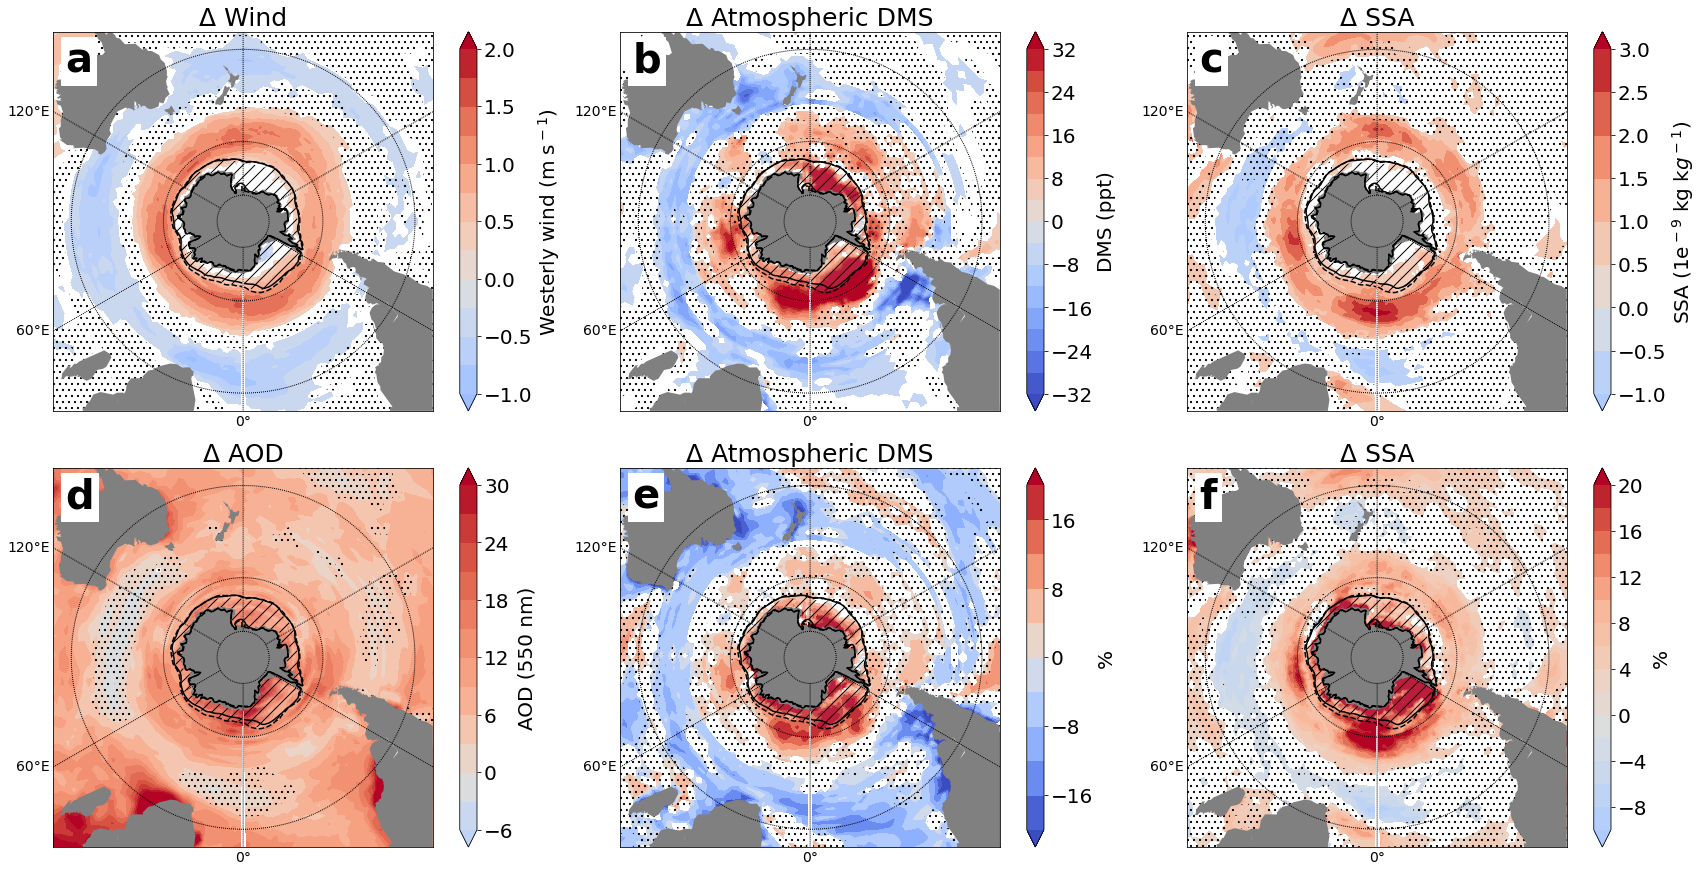

In [217]:

#(rows, columns, position) #  ############################# FIGURE 2 #################################

dataset=[]

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,6):
        for i,l in zip(nums,range(0,8)):
          #  print('models = {}'.format(models[i]))
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
model_var=model_var[:len(nums)]
month='DJF'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Wind','DMS','SSAMMR','AOD','DMS','SSAMMR'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)

data_percentage_rel,data_dot_rel,data_clev_rel,data_shift_rel=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.7, stop=1, name='shifted')
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.4, stop=1, name='shifted') 

shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
clevs_DJF_SSAMMR=np.arange(-10,20+2,2)

clevs_SSA=np.arange(-3,7.5+1.5,1.5)
clevs_SON_Wind=np.arange(-.5,2,.25)
shifted_cmap_Wind_son = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.57, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')

shifted_cmap_SSAMMR_2 = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.65, stop=1, name='shifted')
shifted_cmap_dms_2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.55, stop=0.85, name='shifted')
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')

clevs_SSA=np.arange(-1,3+0.5,0.5)
clevs_DMS=np.arange(-32,32+4,4)
clevs_wind=np.arange(-1,2+0.25,0.25)
clevs_dms_2=np.arange(-20,20+4,4)
clev_aod=np.arange(-0.005,0.0325+0.0025,0.0025)
clev_aod=np.arange(-6,30+3,3)

shift_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shift_wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.55, stop=1, name='shifted')



DATA=[data_percentage[0],data_percentage[1],data_percentage[2],data_percentage[3],data_percentage_rel[4],data_percentage_rel[5]]    
DOT=[data_dot[0],data_dot[1],data_dot[2],data_dot[3],data_dot_rel[4],data_dot_rel[5]]
CLEV=[clevs_wind,clevs_DMS,clevs_SSA,clev_aod,clevs_dms_2,clevs_DJF_SSAMMR]
SHIFT=[shift_wind,shift_dms,ssa_shift,shifted_cmap_AOD,shift_dms,shifted_cmap_SSAMMR_2]


fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=0.05)
n=2; c=3
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['Wind','Atmospheric DMS','SSA','AOD','Atmospheric DMS','SSA'] # Fig 2


units=['Westerly wind (m s$^-$$^1$)','DMS (ppt)','SSA (1e$^-$$^9$ kg k$g^-$$^1$)', 'AOD (550 nm)','%','%']#,'RF-CS (W $m^-$$^2$)']

data_file=np.load('/home/ybh10/CMIP6/Indirect/Rel_Diff/Relative_Difference_Indirect_Dataset_DJF_MEDIAN.npy')
data_file_2=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_DJF_MEDIAN.npy')
dot_file=np.load('/home/ybh10/CMIP6/Indirect/Dots/DJF_Spatial_Dots_MEDIAN.npy')


# data_file=np.load('/home/ybh10/CMIP6/Indirect/Relative_Difference_Indirect_Dataset_DJF.npy')
# data_file_2=np.load('/home/ybh10/CMIP6/Indirect/Absolute_Difference_Indirect_Dataset_DJF.npy')
# dot_file=np.load('/home/ybh10/CMIP6/Indirect/DJF_Spatial_Dots.npy')
data_for_fig2=[data_file_2[4],data_file_2[1],data_file_2[3],data_file[0],data_file[1],data_file[3]] # 'Wind','DMS','SSA','AOD',DMS,SSA
data_dots_for_fig2=[dot_file[4],dot_file[1],dot_file[3],dot_file[0],dot_file[1],dot_file[3]] # 'Wind','DMS','SSA','AOD',DMS,SSA

#sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/DJF/Sea_Ice_DJF_model_mean.npy')
seayy=data_in[2]
nums=[0,1,2,3,4,6,7]
seay=np.zeros((7,75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,7)):
    seay[l]=seayy[i]

sea_ice=np.nanmedian(seay,axis=0)
#sea_ice=data_in[2][3]

clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0, midpoint=0.4, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]#,olon.data,olon.data,lonmesh,lonmesh,lonmesh]
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')
a=[]
data_shift=[shifted_cmap_Wind,shifted_cmap_dms,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,mapy,sig_dot,clev,shift,title,unit,num in  zip(axes,data_for_fig2,data_dots_for_fig2,CLEV,SHIFT,measurement,units,number):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy[-21:],axis=(0))
    sic=np.nanmean(sea_ice[:21],axis=(0))
    sic_new=np.nanmean(sea_ice[-21:],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)

    x,y  = np.meshgrid(lons,lats)

    x, y = map_ax1(x, y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.fillcontinents(color='gray')
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='SSA'!=-1:
        if unit == '%':
            vari=blank_space(mapy,-2,2)
            cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            vari=blank_space(mapy*1e9,-0.5,0.5)
            cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
    else: 
        if title=='Atmospheric DMS':
            if unit == '%':
                vari=blank_space(mapy,-2,2)
                cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-4,4)
                cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            if title=='Wind':
                vari=blank_space(mapy,-0.25,.25)
                cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-0.0025,0.0025)
                cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')

    sea_ice_grid=15
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,sea_ice_grid)
    map_ax1.contour(x,y,sic,levels=[sea_ice_grid],linestyles='dashed',colors='black',vmax=10000)
    map_ax1.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,sea_ice_grid)
    map_ax1.contour(x,y,sic_new,levels=[sea_ice_grid],alpha=1,colors='black',vmax=10000)
        
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
   # if title=='SSA'!=-1:
    var = np.where(sic>sea_ice_grid,np.nan,sig_dot)#mask sea ice
    [m,n] = np.where(var==1)
    z1 = np.zeros(var.shape)
    z1[m,n]=99
    cs3 = map_ax1.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    a.append(z1)
#     else: 
#         var = np.where(sic>sea_ice_grid,np.nan,sig_dot)#mask sea ice
# #         [m,n] = np.where(var==1)
# #         z1 = np.zeros(var.shape)
#         z1[m,n]=99
#         cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/Fig_2_SEA_ICE_contour_15_zonal_MEDIAN_low_res.png",dpi=150,bbox_inches = 'tight')


Ozone


<ipython-input-260-1da5e2fafa5c>:127: RuntimeWarning: Mean of empty slice
  mapy=np.nanmean(data_fig[-21:],axis=(0))


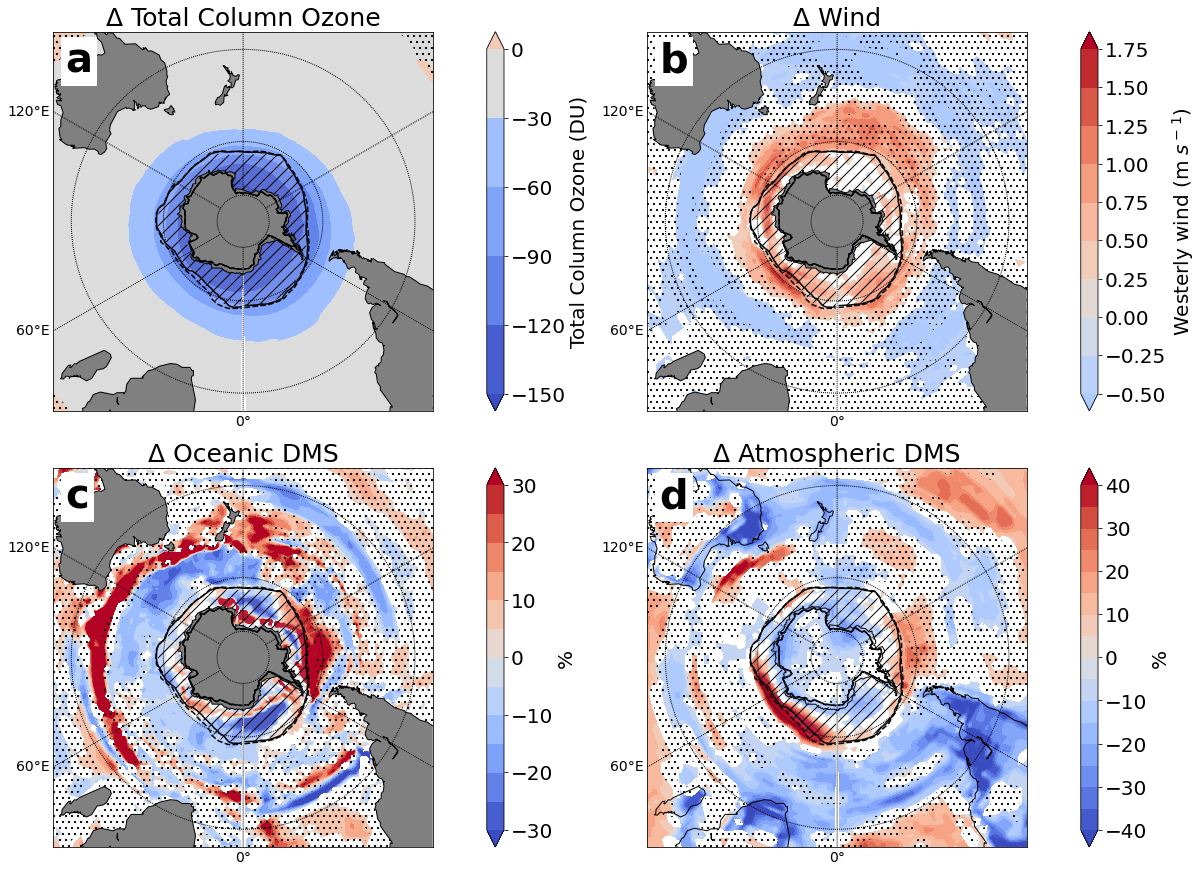

In [260]:
#(rows, columns, position) #  ############################# FIGURE 3 #################################

dataset=[]

Direct_or_Indirect='Direct' ######## CHANGABLE ATTRIBUTION ########
Season_type='SON'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,6):
        for i,l in zip(nums,range(0,8)):
           # print('models = {}'.format(models[i]))
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
###################################################### FOR ROUTE 3 ##############################
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Ozone','Wind','ODMS','DMS'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
# if month == 'DJF':
#     sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
#     ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
# else:
#     sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
#     ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
data_percentage_rel,data_dot_rel,data_clev_rel,data_shift_rel=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


clevs_dms_djf=np.arange(-20,20+2,2) # DMS
clevs_odms_son=np.arange(-2,2+.2,.2) # oDMS
clevs_SON_Wind=np.arange(-.5,2,.25)
clev_ozone=np.arange(-150,30,30) # oDMS

shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_DJF_ODMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')


DATA=[data_percentage[0],data_percentage[1],data_percentage_rel[2],data_percentage_rel[3]]
DOT=[data_dot[0],data_dot[1],data_dot_rel[2],data_dot_rel[3]]
CLEV=[clev_ozone,clevs_SON_Wind,data_clev_rel[2],data_clev_rel[3]]
SHIFT=[shifted_cmap_Ozone,shifted_cmap_Wind,data_shift_rel[2],shifted_cmap_DJF_DMS]

fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=-0.45)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['Total Column Ozone','Wind','Oceanic DMS','Atmospheric DMS'] # Fig 2

data_file=np.load('/home/ybh10/CMIP6/Direct/Rel_Diff/Relative_Difference_Direct_Dataset_{}_MEDIAN.npy'.format(Season_type))
data_file_2=np.load('/home/ybh10/CMIP6/Direct/Abs_Diff/Absolute_Difference_Direct_Dataset_{}_Median.npy'.format(Season_type))
dot_file=np.load('/home/ybh10/CMIP6/Direct/Dots/{}_Spatial_Dots_MEDIAN.npy'.format('SON'))


# data_file=np.load('/home/ybh10/CMIP6/Direct/Relative_Difference_Direct_Dataset_{}.npy'.format(Season_type))
# data_file_2=np.load('/home/ybh10/CMIP6/Direct/Absolute_Difference_Direct_Dataset_{}.npy'.format(Season_type))
# #wind=np.nanmean(wind[4],axis=0)
# dot_file_wind=np.load('/home/ybh10/CMIP6/Indirect/{}_Spatial_Dots.npy'.format('SON'))[4]
# dot_file=np.load('/home/ybh10/CMIP6/Direct/{}_Spatial_Dots.npy'.format('SON'))
data_for_fig3=[data_file_2[2]*100000,data_file[3],data_file[0],data_file[1]] # 'Wind','DMS','SSA','AOD',DMS,SSA
data_dots_for_fig3=[dot_file[2],dot_file[3],dot_file[0],dot_file[1]] # 'Wind','DMS','SSA','AOD',DMS,SSA

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))
seayy=data_in[2]
#nums=[0,1,3,5,7,8,9,10]

nums=[0,1,3,4,5,6,7,9,11]
seay=np.zeros((len(nums),75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,len(nums))):
    seay[l]=sea_ice_file[i]
sea_ice=np.nanmedian(seay,axis=0)

#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['Total Column Ozone (DU)','Westerly wind (m s$^-$$^1$)','%', '%']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/DMS_SSA.npy'.format(month))
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')


data_shift=[shifted_cmap_Wind,shifted_cmap_dms,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,data_fig,sig_dot,clev,shift,title,unit,num in  zip(axes,data_for_fig3,data_dots_for_fig3,CLEV,SHIFT,measurement,units,number):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(data_fig[-21:],axis=(0))
    sic=np.nanmean(sea_ice[:21],axis=(0))
    sic_new=np.nanmean(sea_ice[-21:],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
    
    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='Oceanic DMS'!=-1:
        vari=blank_space(mapy,-2.5,2.5)
        cs=ax.contourf(x,y,vari,clev,cmap='coolwarm',extend='both')
        map_ax1.fillcontinents(color='gray')
    else: 
        if title=='Atmospheric DMS':
            vari=blank_space(mapy,-5,5)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            if title=='Wind':
                map_ax1.fillcontinents(color='gray')
                vari=blank_space(mapy,-0.25,0.25)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                map_ax1.fillcontinents(color='gray')
                vari=blank_space(mapy,-20,20)
                print('Ozone')
                cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
#     if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
#         pass
#     else:
    sea_ice_grid=15
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,sea_ice_grid)
    ax.contour(x,y,sic,levels=[sea_ice_grid],linestyles='dashed',colors='black',vmax=10000)
    map_ax1.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,sea_ice_grid)
    ax.contour(x,y,sic_new,levels=[sea_ice_grid],alpha=1,colors='black',vmax=10000)
        
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
#     if title=='Wind' !=-1:
#         var = np.where(sic,np.nan,sig_dot)#mask sea ice
#         [m,n] = np.where(sig_dot==1)
#         z1 = np.zeros(var.shape)
#         z1[m,n]=99
#         cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
#     else:
    var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
    [m,n] = np.where(var==1)
    z1 = np.zeros(var.shape)
    z1[m,n]=99
    cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    
#plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/Fig_3_SEA_ICE_contour_15_MEDIAN_low_res.png",dpi=150,bbox_inches = 'tight')


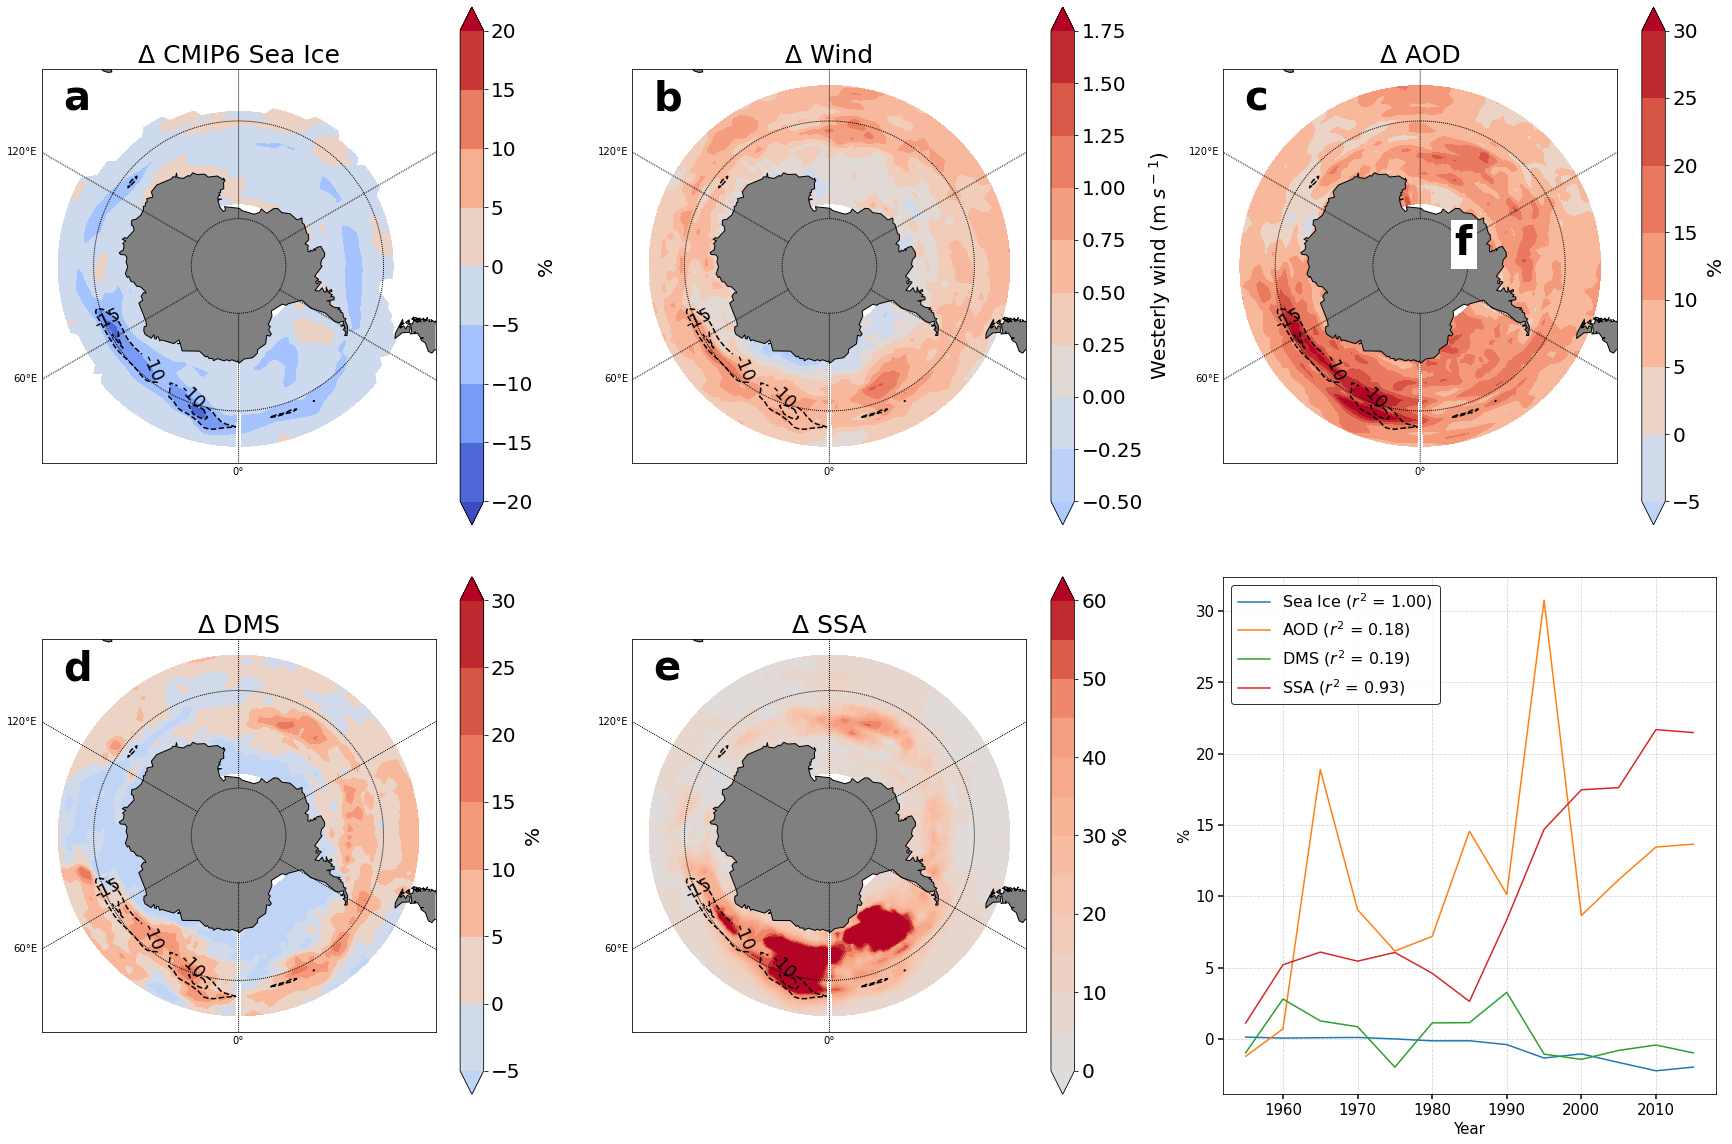

In [257]:
#################################################################################################################################
########################################################## FIGURE 5 Sea Ice ##############################################################
#################################################################################################################################
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='SON'           ######## CHANGABLE ATTRIBUTION ########

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))
data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))

nums=[0,6,9]
nums=[0,1,3,4,5,6,7,9,11]

seay=np.zeros((len(nums),75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,len(nums))):
    seay[l]=sea_ice_file[i]
sea_ice=np.nanmean(seay,axis=0)

def sea_ice_bias(data,pre_num,post_num,sea_ice_data):
    sic_new=np.nanmean(sea_ice_data[-post_num:],axis=(0))
#     pre=np.nanmedian(data[:,:pre_num],axis=(1))
    post=np.nanmedian(data[-post_num:],axis=(0))
#     var_old = np.where(sic==0,np.nan,pre)#mask sea ice
    var_new = np.where(sic_new==0,np.nan,post)#mask sea ice
#     model_diff=var_new-var_old
    return post
def for_sea_ice(data,pre_num,post_num,sea_ice_data):
    sic=np.nanmean(data[:pre_num],axis=(0))
    sic_new=np.nanmean(data[-post_num:],axis=(0))
    var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    var_old = np.where(sic==0,np.nan,sic)#mask sea ice
    model_diff=var_new-var_old
    return model_diff

sic=np.nanmean(sea_ice[:21],axis=(0))
sic_new=np.nanmean(sea_ice[-21:],axis=(0))
var_old = np.where(sic==0,np.nan,sic)#mask sea ice
var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
var_diff=var_new-var_old
# -9.99
#sea=copy.deepcopy(var_new)
sea=np.where(var_diff>-9.99,np.nan,var_diff)
laty=np.where((sea[0:40]<0))             
lats_ice=laty[0]
lons_ice=laty[1]
data_sea_ice=np.nanmean(np.where(np.isnan(sea),np.nan,data_file[2])[:,:40],axis=(1,2))
data_wind=np.nanmean(np.where(np.isnan(sea),np.nan,data_file[4])[:,:40],axis=(1,2))
data_aod=np.nanmean(np.where(np.isnan(sea),np.nan,data_file[0])[:,:40],axis=(1,2))             
data_dms=np.nanmean(np.where(np.isnan(sea),np.nan,data_file[1])[:,:40],axis=(1,2))             
data_ssa=np.nanmean(np.where(np.isnan(sea),np.nan,data_file[3])[:,:40],axis=(1,2))       
            
sea_ice_area=[data_sea_ice,data_aod,data_dms,data_ssa]
#data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))
data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))

sea_ice_cmip6_diff=sea_ice_bias(sea_ice,21,21,sea_ice)
#model_bias=var_diff-HAD_Diff[3]
aod_cmip6_diff=sea_ice_bias(data_file[0],21,21,sea_ice)
dms_cmip6_diff=sea_ice_bias(data_file[1],21,21,sea_ice)
ssa_cmip6_diff=sea_ice_bias(data_file[3],21,21,sea_ice)


data_set=[var_diff,data_file[4],data_file[0],data_file[1],data_file[3],sea_ice_area]
titles=['CMIP6 Sea Ice','Wind','AOD','DMS','SSA','']    

fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.1)
n=2; c=3
sh_lat=lats[10:40]

units=['%','Westerly wind (m s$^-$$^1$)','%','%','%','%']#,'RF-CS (W $m^-$$^2$)']

ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
clevs_SON_Sea_ice=np.arange(-20,20+5,5)   
clevs_SON_aod=np.arange(-5,30+5,5)   
clevs_SON_dms=np.arange(-10,40+5,5)   
clevs_SON_ssa=np.arange(0,60+5,5)   
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
clevs_SON_Wind=np.arange(-.5,2,.25)
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.4, stop=1, name='shifted') 

clevs=[clevs_SON_Sea_ice,clevs_SON_Wind,clevs_SON_aod,clevs_SON_aod,clevs_SON_ssa,1]

shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.12, stop=.55, name='shifted') 
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 

shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.75, stop=1, name='shifted') 

shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.6, stop=1, name='shifted') 

dats_shifty=[shifted_cmap_Sea_Ice,shifted_cmap_Wind,shifted_cmap_AOD,shifted_cmap_AOD,shifted_cmap_aod,shifted_cmap_aod]
labels=['Sea Ice','AOD','DMS','SSA']
measurements=['a','b','c','d','e','f']
#leve=np.arange(-10,-5,5)
leve=np.arange(-60,-5,5)

for ax,mapy,title,clev,shift,num,unit in zip(axes,data_set,titles,clevs,dats_shifty,measurements,units):
#     sic=np.nanmean(seay_ice[90:111],axis=(0))
#     sic_new=np.nanmean(seay_ice[145::],axis=(0))
   # datas=np.nanmedian(mapy,axis=0)
    #model_contour=np.nanmedian(sea_ice_cmip6_diff,axis=0)
    ax.grid(linestyle='--',alpha=0.5)
    year_5=np.arange(1950,2020,5)

#     var_old = np.where(sic==0,np.nan,sic)#mask sea ice
#     var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice

   # ax.set_ylabel('Latitude',fontsize=20)
  #  y_labels = ['70S','60S']
  #  y_lab=np.arange(-70,-60+10,10)

  #  ax.set_yticks(y_lab); ax.set_yticklabels(y_labels,fontsize=15)


#    cs=ax.contourf(lony,laty,var_new[10:40]-var_old[10:40],cmap=shifts)#,levels=levels)
    if title == 'AOD' or title == 'DMS' or title == 'SSA' or title == 'Wind' !=-1:
        map_ax1 = Basemap(projection='spstere',boundinglat=-50, lon_0=0,
                        resolution ='c',ax=ax)
        x,y  = np.meshgrid(lons,lats[10:30])
        x, y = map_ax1(x, y)
        meridians = np.arange(0.,360,60.)    
        parallels = np.arange(-90.,90,30.)
        map_ax1.drawcoastlines()
        map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)  
        map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=10)
        map_ax1.fillcontinents(color='gray')
        cs=map_ax1.contourf(x,y,np.nanmedian(mapy[45:65,10:30],axis=0), clev,extend='both',cmap=shift)
        ts=map_ax1.contour(x,y,var_diff[10:30],colors=('black',),levels=leve,alpha=1)

        cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
        cbar.ax.tick_params(labelsize=20)
        cbar.set_label('{}'.format(unit),fontsize=20)
        ax.set_title("\u0394 {}".format(title),fontsize=25)
        ax.clabel(ts, fmt = '%2.1d', colors = 'k', fontsize=17) #contour line labels
        t=ax.text(-500000,-8300000,num,color='black',fontsize=40,fontweight='bold')
        t.set_bbox(dict(facecolor='white', edgecolor='white'))
    else:
        if title == 'CMIP6 Sea Ice'!=-1:
            map_ax1 = Basemap(projection='spstere',boundinglat=-50, lon_0=0,
                            resolution ='c',ax=ax)
            x,y  = np.meshgrid(lons,lats[10:30])
            x, y = map_ax1(x, y)
            meridians = np.arange(0.,360,60.)    
            parallels = np.arange(-90.,90,30.)
            map_ax1.drawcoastlines()
            map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)  
            map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=10)
            map_ax1.fillcontinents(color='gray')
            cs=map_ax1.contourf(x,y,mapy[10:30], clev,extend='both',cmap=shift)
            ts=map_ax1.contour(x,y,var_diff[10:30],colors=('black',),levels=leve,alpha=1)

            cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
            cbar.ax.tick_params(labelsize=20)
            cbar.set_label('%',fontsize=20)
            ax.set_title("\u0394 {}".format(title),fontsize=25)
            ax.clabel(ts, fmt = '%2.1d', colors = 'k', fontsize=17) #contour line labels
            t=ax.text(-500000,-8300000,num,color='black',fontsize=40,fontweight='bold')
            t.set_bbox(dict(facecolor='white', edgecolor='white'))
        else:
            for i in range(0,len(mapy)):
                five_mean=np.zeros((4,14)); five_mean[:]=np.nan
                fives=np.arange(0,65+5,5)
                for ini in (range(0,len(five_mean))):
                    for t in (range(0,13)):
                        five_mean[ini,t+1]=np.nanmean(mapy[ini][fives[t]:fives[t+1]],axis=0)
                r2=(ma.corrcoef(ma.masked_invalid(five_mean[0]), ma.masked_invalid(five_mean[i]))**2)[1][0]
                ax.plot(year_5,five_mean[i],alpha=1,label='{} ($r^2$ = {:.2f})'.format(labels[i],r2))#,label = "O3")
                ax.legend(fontsize=16,edgecolor='black')
                ax.set_ylabel("%".format(var),fontsize=15)
                ax.set_xlabel("Year",fontsize=15)
                tkw = dict(size=5, width=1.5)
                ax.tick_params(**tkw,labelsize=15)
                t=ax.text(1983,55,num,color='black',fontsize=40,fontweight='bold')
                t.set_bbox(dict(facecolor='white', edgecolor='white'))

#     t=ax.text(3,0,'\u0394 {}'.format(title),color='black',fontsize=22,fontweight='bold')
#     t.set_bbox(dict(facecolor='white', edgecolor='white'))
#     divider = make_axes_locatable(ax)

        

plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/SEA_ICE_{}_{}_MAPPED_Figure_low_res.png".format(Season_type,Direct_or_Indirect),dpi=150,bbox_inches = 'tight')

#print(ma.corrcoef(ma.masked_invalid(five_mean[0]), ma.masked_invalid(five_mean[3])))

In [117]:
#################################################################################################################################
########################################################## FIGURE 5 Sea Ice ##############################################################
#################################################################################################################################
from mpl_toolkits.axes_grid1 import make_axes_locatable

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='SON'           ######## CHANGABLE ATTRIBUTION ########

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))

nums=[0,6,9]
nums=[0,1,3,4,5,6,7,9,11]

seay=np.zeros((len(nums),75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,len(nums))):
    seay[l]=sea_ice_file[i]
sea_ice=np.nanmean(seay,axis=0)

def sea_ice_bias(data,pre_num,post_num,sea_ice_data):
    sic_new=np.nanmean(sea_ice_data[-post_num:],axis=(0))
#     pre=np.nanmedian(data[:,:pre_num],axis=(1))
    post=np.nanmedian(data[-post_num:],axis=(0))
#     var_old = np.where(sic==0,np.nan,pre)#mask sea ice
    var_new = np.where(sic_new==0,np.nan,post)#mask sea ice
#     model_diff=var_new-var_old
    return post
def for_sea_ice(data,pre_num,post_num,sea_ice_data):
    sic=np.nanmean(data[:pre_num],axis=(0))
    sic_new=np.nanmean(data[-post_num:],axis=(0))
    var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    var_old = np.where(sic==0,np.nan,sic)#mask sea ice
    model_diff=var_new-var_old
    return model_diff

sic=np.nanmean(sea_ice[:21],axis=(0))
sic_new=np.nanmean(sea_ice[-21:],axis=(0))
var_old = np.where(sic==0,np.nan,sic)#mask sea ice
var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
var_diff=var_new-var_old


#data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))
data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))

sea_ice_cmip6_diff=sea_ice_bias(sea_ice,21,21,sea_ice)
model_bias=var_diff-HAD_Diff[3]
aod_cmip6_diff=sea_ice_bias(data_file[0],21,21,sea_ice)
dms_cmip6_diff=sea_ice_bias(data_file[1],21,21,sea_ice)
ssa_cmip6_diff=sea_ice_bias(data_file[3],21,21,sea_ice)


data_set=[var_diff,HAD_Diff[3],model_bias,data_file[0],data_file[1],data_file[3]]
titles=['CMIP6 Sea Ice','HADISST Ice','CMIP Bias','AOD','DMS','SSA']    

fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.1)
n=2; c=3
sh_lat=lats[10:40]

units=['%','%','%','%','%','%']#,'RF-CS (W $m^-$$^2$)']

ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
leve=np.arange(-60,0+5,5)
clevs_SON_Sea_ice=np.arange(-40,40+10,10)   
clevs_SON_aod=np.arange(0,30+5,5)   
clevs_SON_dms=np.arange(-10,40+5,5)   
clevs_SON_ssa=np.arange(0,60+5,5)   

clevs=[clevs_SON_Sea_ice,clevs_SON_Sea_ice,clevs_SON_Sea_ice,clevs_SON_aod,clevs_SON_dms,clevs_SON_ssa]
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.12, stop=.55, name='shifted') 
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 

shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.75, stop=1, name='shifted') 

shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.6, stop=1, name='shifted') 

dats_shifty=[shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice,shifted_cmap_aod,shifted_cmap_dms,shifted_cmap_aod]

for ax,mapy,title,clev,shift in zip(axes,data_set,titles,clevs,dats_shifty):
#     sic=np.nanmean(seay_ice[90:111],axis=(0))
#     sic_new=np.nanmean(seay_ice[145::],axis=(0))
   # datas=np.nanmedian(mapy,axis=0)
    #model_contour=np.nanmedian(sea_ice_cmip6_diff,axis=0)
    ax.grid(linestyle='--',alpha=0.5)
#     var_old = np.where(sic==0,np.nan,sic)#mask sea ice
#     var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    map_ax1 = Basemap(projection='spstere',boundinglat=-50, lon_0=0,
                    resolution ='c',ax=ax)
    x,y  = np.meshgrid(lons,lats[10:30])
    x, y = map_ax1(x, y)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=10)
    map_ax1.fillcontinents(color='gray')
   # ax.set_ylabel('Latitude',fontsize=20)
  #  y_labels = ['70S','60S']
  #  y_lab=np.arange(-70,-60+10,10)

  #  ax.set_yticks(y_lab); ax.set_yticklabels(y_labels,fontsize=15)


    ax.set_title("\u0394 {}".format(title),fontsize=25)
#    cs=ax.contourf(lony,laty,var_new[10:40]-var_old[10:40],cmap=shifts)#,levels=levels)
    if title == 'AOD' or title == 'DMS' or title == 'SSA':
        cs=map_ax1.contourf(x,y,np.nanmedian(mapy[45:65,10:30],axis=0), clev,extend='both',cmap=shift)
        ts=map_ax1.contour(x,y,var_diff[10:30],levels=leve,alpha=0.75)
    else:
        if title == 'HADISST Ice':
            vari=blank_space(mapy,-0.001,0.001)
            cs=map_ax1.contourf(x,y,vari[10:30], clev,extend='both',cmap=shift)
            ts=map_ax1.contour(x,y,var_diff[10:30],levels=leve,alpha=0.5)
        else:
            cs=map_ax1.contourf(x,y,mapy[10:30], clev,extend='both',cmap=shift)
            ts=map_ax1.contour(x,y,var_diff[10:30],levels=leve,alpha=0.5)
    
#     t=ax.text(3,0,'\u0394 {}'.format(title),color='black',fontsize=22,fontweight='bold')
#     t.set_bbox(dict(facecolor='white', edgecolor='white'))
#     divider = make_axes_locatable(ax)

        
    ax.clabel(ts, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label('%',fontsize=20)

plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/SEA_ICE_{}_{}_Mediandata_Meanice_MAPPED.png".format(Season_type,Direct_or_Indirect),dpi=600,bbox_inches = 'tight')



NameError: name 'HAD_Diff' is not defined

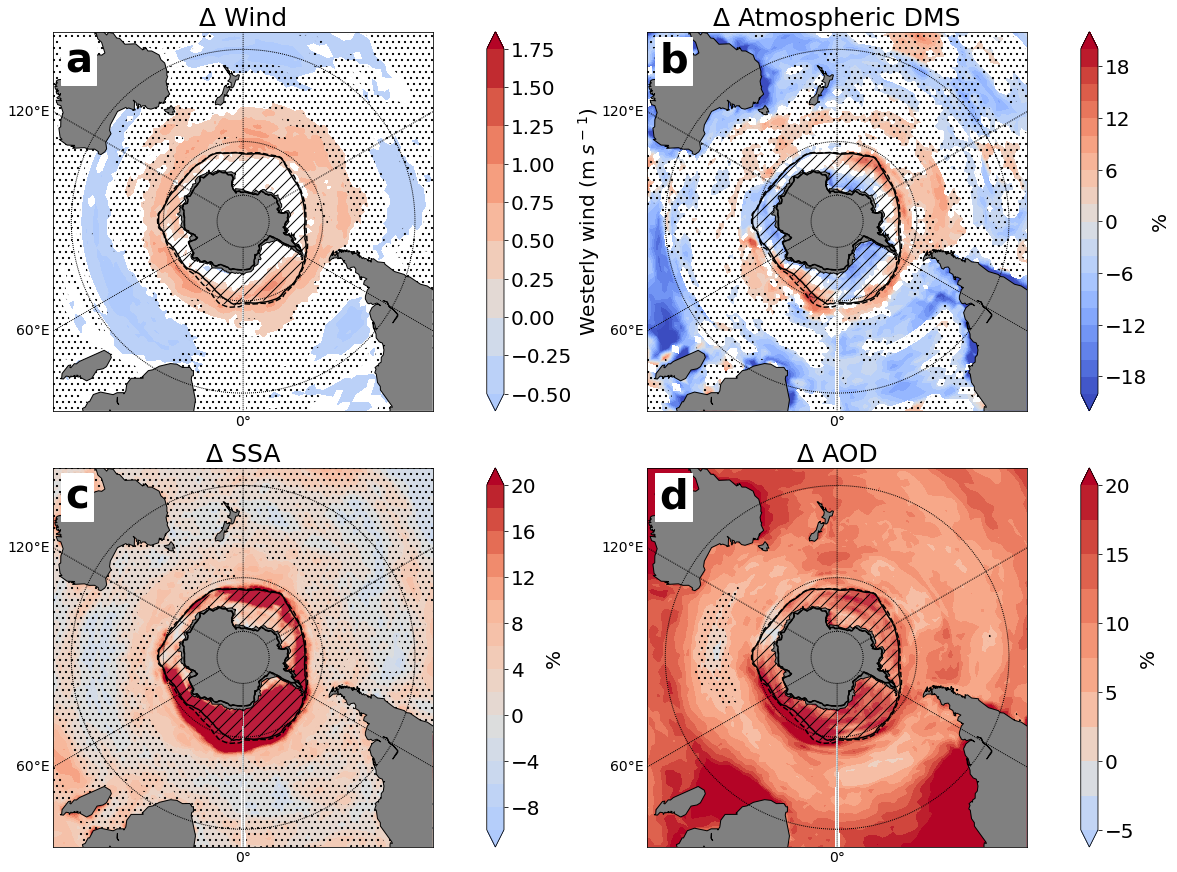

In [167]:
#(rows, columns, position) #  ############################# FIGURE SON Indirect #################################

dataset=[]

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='SON'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,6):
        for i,l in zip(nums,range(0,8)):
           # print('models = {}'.format(models[i]))
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
###################################################### FOR ROUTE 3 ##############################
clevs_dms_son=np.arange(-20,20+2,2) # DMS
clevs_ssa_son=np.arange(-20,20+2,2) # oDMS
clevs_SON_Wind=np.arange(-.5,2,.25)
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_DJF_ODMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.4, stop=1, name='shifted') 
clevs_SON_aod=np.arange(-0.005,0.0325+0.0025,0.0025)
clevs_SON_aod=np.arange(-5,20+2.5,2.5)
shifted_cmap_SSAMMR_2 = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.65, stop=1, name='shifted')
clevs_DJF_SSAMMR=np.arange(-10,20+2,2)


CLEV=[clevs_SON_Wind,clevs_dms_djf,clevs_DJF_SSAMMR,clevs_SON_aod]

fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=-0.45)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['Wind','Atmospheric DMS','SSA','AOD'] # Fig 2

data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))
data_file_2=np.load('/home/ybh10/CMIP6/{}/Abs_Diff/Absolute_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))
dot_file=np.load('/home/ybh10/CMIP6/{}/Dots/{}_Spatial_Dots_MEDIAN.npy'.format(Direct_or_Indirect,'SON'))


# data_file=np.load('/home/ybh10/CMIP6/Direct/Relative_Difference_Direct_Dataset_{}.npy'.format(Season_type))
# data_file_2=np.load('/home/ybh10/CMIP6/Direct/Absolute_Difference_Direct_Dataset_{}.npy'.format(Season_type))
# #wind=np.nanmean(wind[4],axis=0)
# dot_file_wind=np.load('/home/ybh10/CMIP6/Indirect/{}_Spatial_Dots.npy'.format('SON'))[4]
# dot_file=np.load('/home/ybh10/CMIP6/Direct/{}_Spatial_Dots.npy'.format('SON'))
data_for_fig3=[data_file_2[4],data_file[1],data_file[3],data_file[0]] # 'Wind','DMS','SSA','AOD'

data_dots_for_fig3=[dot_file[4],dot_file[1],dot_file[3],dot_file[0]] # 'Wind','DMS','SSA','AOD'

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))
seayy=data_in[2]
#nums=[0,1,3,5,7,8,9,10]

nums=[0,1,3,4,5,6,7,9,11]
seay=np.zeros((len(nums),75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,len(nums))):
    seay[l]=sea_ice_file[i]
sea_ice=np.nanmedian(seay,axis=0)

#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['Westerly wind (m s$^-$$^1$)','%','%', '%']#,'RF-CS (W $m^-$$^2$)']
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')

shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.37, midpoint=0.4, stop=1, name='shifted') 


data_shift=[shifted_cmap_Wind,shifted_cmap_DJF_DMS,shifted_cmap_SSAMMR_2,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,data_fig,sig_dot,clev,shift,title,unit,num in  zip(axes,data_for_fig3,data_dots_for_fig3,CLEV,data_shift,measurement,units,number):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(data_fig[-21:],axis=(0))
    sic=np.nanmean(sea_ice[:21],axis=(0))
    sic_new=np.nanmean(sea_ice[-21:],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
    
    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.fillcontinents(color='gray')
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='Oceanic DMS'!=-1:
        vari=blank_space(mapy,-2.5,2.5)
        cs=ax.contourf(x,y,vari,clev,cmap='coolwarm',extend='both')
    else: 
        if title=='Atmospheric DMS':
            vari=blank_space(mapy,-2,2)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            if title=='Wind':
                vari=blank_space(mapy,-0.25,0.25)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-20,20)
                cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
#     if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
#         pass
#     else:
    sea_ice_grid=30
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,sea_ice_grid)
    ax.contour(x,y,sic,levels=[sea_ice_grid],linestyles='dashed',colors='black',vmax=10000)
    map_ax1.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,sea_ice_grid)
    ax.contour(x,y,sic_new,levels=[sea_ice_grid],alpha=1,colors='black',vmax=10000)
        
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
#     if title=='Wind' !=-1:
#         var = np.where(sic,np.nan,sig_dot)#mask sea ice
#         [m,n] = np.where(sig_dot==1)
#         z1 = np.zeros(var.shape)
#         z1[m,n]=99
#         cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
#     else:
    var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
    [m,n] = np.where(var==1)
    z1 = np.zeros(var.shape)
    z1[m,n]=99
    cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    
plt.show()

#plt.savefig("/home/ybh10/CMIP6/Figures/Fig_3_SEA_ICE_contour_15_MEDIAN.png",dpi=600,bbox_inches = 'tight')


In [63]:
#################################################################################################################################
########################################################## Direct SON Sea Ice ##############################################################
#################################################################################################################################

Direct_or_Indirect='Direct' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))

nums=[0,6,9]
seay=np.zeros((len(nums),75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,len(nums))):
    seay[l]=sea_ice_file[i]
sea_ice=np.nanmean(seay,axis=0)

def sea_ice_bias(data,pre_num,post_num,sea_ice_data):
    sic_new=np.nanmean(sea_ice_data[-post_num:],axis=(0))
#     pre=np.nanmedian(data[:,:pre_num],axis=(1))
    post=np.nanmedian(data[-post_num:],axis=(0))
#     var_old = np.where(sic==0,np.nan,pre)#mask sea ice
    var_new = np.where(sic_new==0,np.nan,post)#mask sea ice
#     model_diff=var_new-var_old
    return post
def for_sea_ice(data,pre_num,post_num,sea_ice_data):
    sic=np.nanmean(data[:pre_num],axis=(0))
    sic_new=np.nanmean(data[-post_num:],axis=(0))
    var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    var_old = np.where(sic==0,np.nan,sic)#mask sea ice
    model_diff=var_new-var_old
    return model_diff

sic=np.nanmean(sea_ice[:21],axis=(0))
sic_new=np.nanmean(sea_ice[-21:],axis=(0))
var_old = np.where(sic==0,np.nan,sic)#mask sea ice
var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
var_diff=var_new-var_old


#data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))
data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))

sea_ice_cmip6_diff=sea_ice_bias(sea_ice,21,21,sea_ice)
model_bias=var_diff-HAD_Diff[0]
aod_cmip6_diff=sea_ice_bias(data_file[0],21,21,sea_ice)
dms_cmip6_diff=sea_ice_bias(data_file[1],21,21,sea_ice)
ssa_cmip6_diff=sea_ice_bias(data_file[3],21,21,sea_ice)


data_set=[var_diff,HAD_Diff[0],model_bias,data_file[0],data_file[1],data_file[3]]
titles=['CMIP6 Sea Ice','HADISST Ice','CMIP Bias','Oceanic DMS','DMS','Wind']    

fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.1)
n=2; c=3
sh_lat=lats[10:40]

units=['%','Wind','%','%','%','%']#,'RF-CS (W $m^-$$^2$)']

ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
leve=np.arange(-60,20+10,10)
clevs_SON_Sea_ice=np.arange(-40,40+10,10)   
clevs_SON_aod=np.arange(0,30+5,5)   
clevs_SON_dms=np.arange(-10,40+5,5)   
clevs_SON_ssa=np.arange(-1,2+.1,.1)   

clevs=[clevs_SON_Sea_ice,clevs_SON_Sea_ice,clevs_SON_Sea_ice,clevs_SON_Sea_ice,clevs_SON_dms,clevs_SON_ssa]
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.12, stop=.55, name='shifted') 
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 

shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.75, stop=1, name='shifted') 

shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.6, stop=1, name='shifted') 

dats_shifty=[shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice,shifted_cmap_dms,shifted_cmap_dms]
for ax,mapy,title,clev,shift in zip(axes,data_set,titles,clevs,dats_shifty):
#     sic=np.nanmean(seay_ice[90:111],axis=(0))
#     sic_new=np.nanmean(seay_ice[145::],axis=(0))
   # datas=np.nanmedian(mapy,axis=0)
    #model_contour=np.nanmedian(sea_ice_cmip6_diff,axis=0)
    ax.grid(linestyle='--',alpha=0.5)
    map_ax1 = Basemap(projection='spstere',boundinglat=-50, lon_0=0,
                    resolution ='c',ax=ax)
    x,y  = np.meshgrid(lons,lats[10:30])
    x, y = map_ax1(x, y)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=10)
    map_ax1.fillcontinents(color='gray')
#     var_old = np.where(sic==0,np.nan,sic)#mask sea ice
#     var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    ax.set_ylabel('Latitude',fontsize=20)
#     y_labels = ['70S','60S']
#     y_lab=np.arange(-70,-60+10,10)

#     ax.set_yticks(y_lab); ax.set_yticklabels(y_labels,fontsize=15)


    ax.set_title("\u0394 {}".format(title),fontsize=25)
#    cs=ax.contourf(lony,laty,var_new[10:40]-var_old[10:40],cmap=shifts)#,levels=levels)
    if title == 'Oceanic DMS' or title == 'DMS' or title == 'Wind':
        cs=map_ax1.contourf(x,y,np.nanmedian(mapy[45:65,10:30],axis=0), clev,extend='both',cmap=shift)
        ts=map_ax1.contour(x,y,var_diff[10:30],levels=leve)
    else:
        if title == 'HADISST Ice':
            vari=blank_space(mapy,-0.001,0.001)
            cs=map_ax1.contourf(x,y,vari[10:30], clev,extend='both',cmap=shift)
            ts=map_ax1.contour(x,y,var_diff[10:30],levels=leve,alpha=0.5)
        else:
            cs=map_ax1.contourf(x,y,mapy[10:30], clev,extend='both',cmap=shift)
            ts=map_ax1.contour(x,y,var_diff[10:30],levels=leve,alpha=0.5)

    ax.clabel(ts, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.ax.tick_params(labelsize=20)
plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/SEA_ICE_{}_{}_Mediandata_Meanice.png".format(Season_type,Direct_or_Indirect),dpi=600,bbox_inches = 'tight')



<ipython-input-63-2eec9f87a55c>:15: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(seay,axis=0)
<ipython-input-63-2eec9f87a55c>:33: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[:21],axis=(0))
<ipython-input-63-2eec9f87a55c>:34: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(sea_ice[-21:],axis=(0))
<ipython-input-63-2eec9f87a55c>:18: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(sea_ice_data[-post_num:],axis=(0))
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


NameError: name 'HAD_Diff' is not defined

<ipython-input-30-854303a2f21f>:15: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(seay,axis=0)
<ipython-input-30-854303a2f21f>:33: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[:21],axis=(0))
<ipython-input-30-854303a2f21f>:34: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(sea_ice[-21:],axis=(0))
<ipython-input-30-854303a2f21f>:18: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(sea_ice_data[-post_num:],axis=(0))


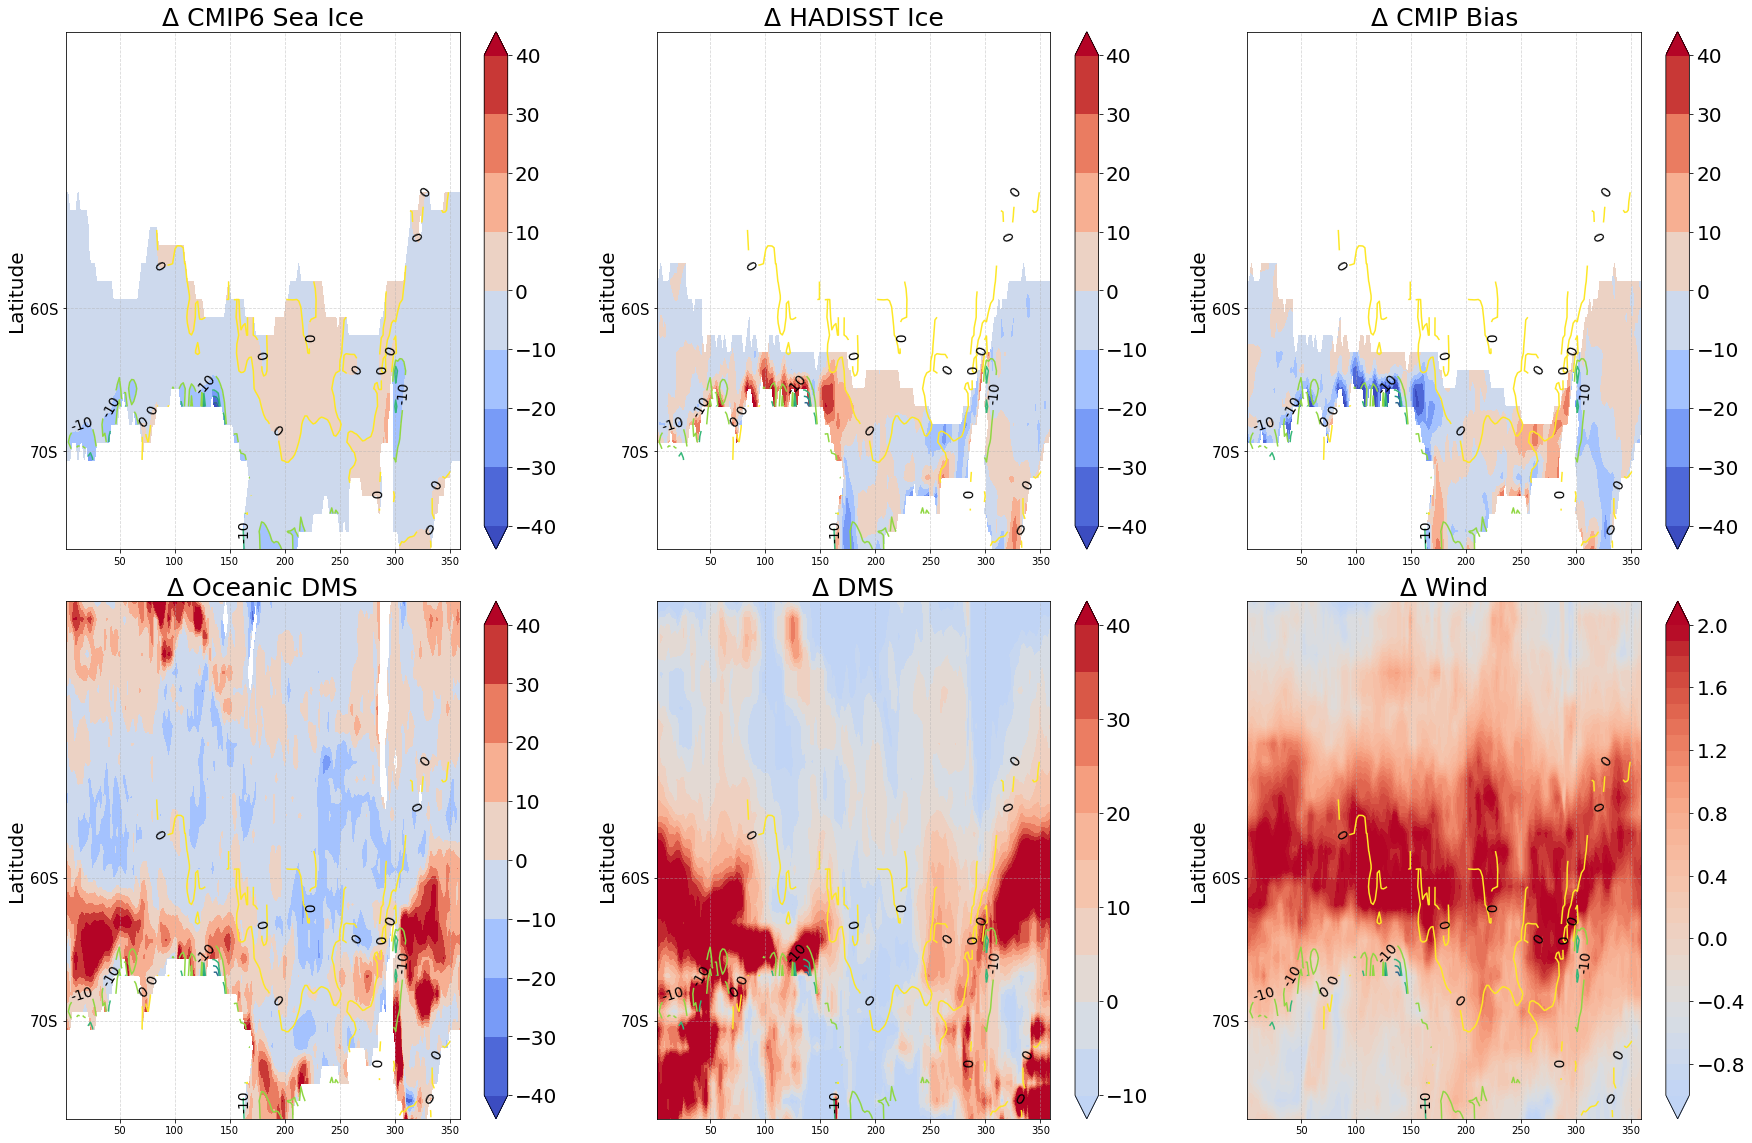

Ozone


<ipython-input-203-758affa8b98e>:128: RuntimeWarning: Mean of empty slice
  mapy=np.nanmean(data_fig[-21:],axis=(0))


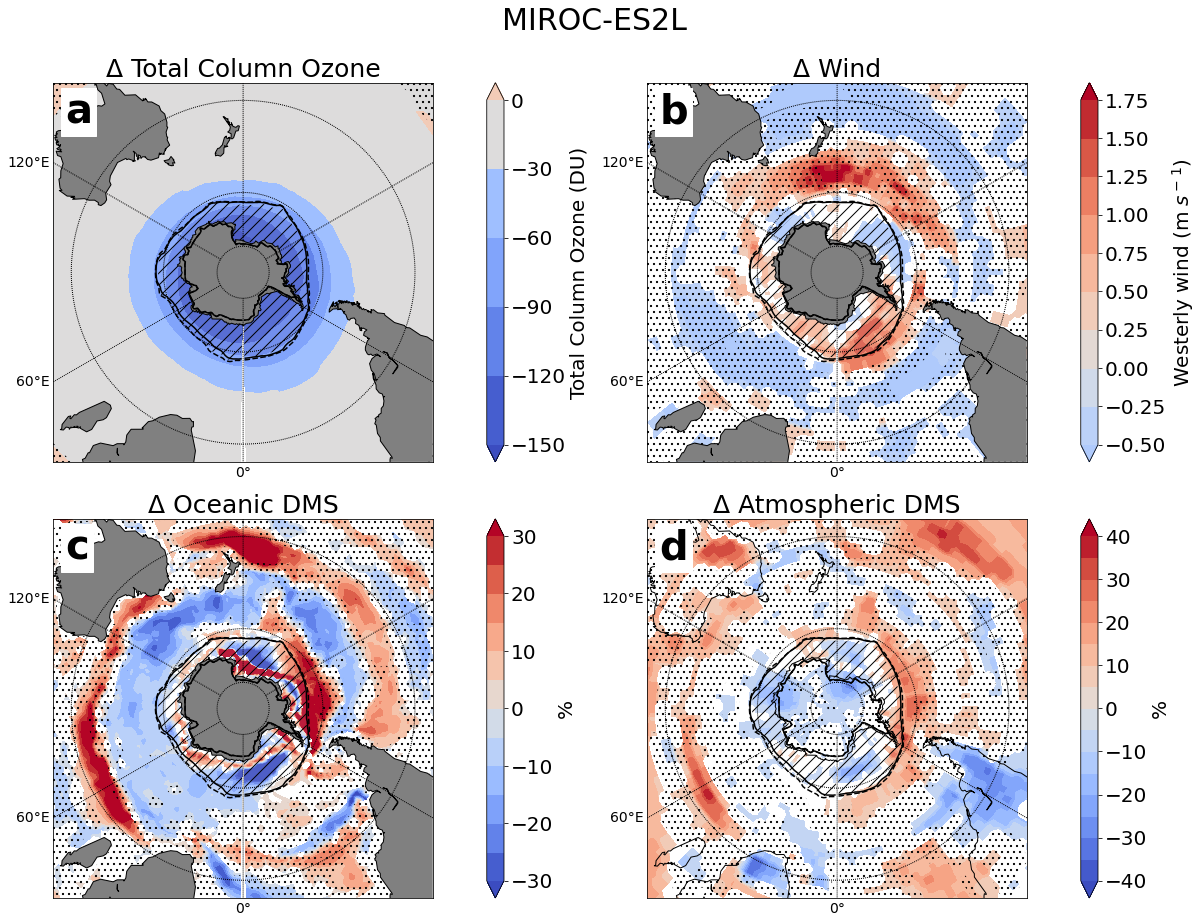

In [203]:
#(rows, columns, position) #  ############################# FIGURE 3 #################################

dataset=[]

Direct_or_Indirect='Direct' ######## CHANGABLE ATTRIBUTION ########
Season_type='SON'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,6):
        for i,l in zip(nums,range(0,8)):
           # print('models = {}'.format(models[i]))
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
###################################################### FOR ROUTE 3 ##############################
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Ozone','Wind','ODMS','DMS'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
# if month == 'DJF':
#     sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
#     ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
# else:
#     sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
#     ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
data_percentage_rel,data_dot_rel,data_clev_rel,data_shift_rel=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


clevs_dms_djf=np.arange(-20,20+2,2) # DMS
clevs_odms_son=np.arange(-2,2+.2,.2) # oDMS
clevs_SON_Wind=np.arange(-.5,2,.25)
clev_ozone=np.arange(-150,30,30) # oDMS

shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_DJF_ODMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')


DATA=[data_percentage[0],data_percentage[1],data_percentage_rel[2],data_percentage_rel[3]]
DOT=[data_dot[0],data_dot[1],data_dot_rel[2],data_dot_rel[3]]
CLEV=[clev_ozone,clevs_SON_Wind,data_clev_rel[2],data_clev_rel[3]]
SHIFT=[shifted_cmap_Ozone,shifted_cmap_Wind,data_shift_rel[2],shifted_cmap_DJF_DMS]

fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=-0.45)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['Total Column Ozone','Wind','Oceanic DMS','Atmospheric DMS'] # Fig 2

data_file=np.load('/home/ybh10/CMIP6/Direct/Rel_Diff/Relative_Difference_Direct_Dataset_{}_MEDIAN.npy'.format(Season_type))
data_file_2=np.load('/home/ybh10/CMIP6/Direct/Abs_Diff/Absolute_Difference_Direct_Dataset_{}_Median.npy'.format(Season_type))
dot_file=np.load('/home/ybh10/CMIP6/Direct/Dots/{}_Spatial_Dots_MEDIAN.npy'.format('SON'))

data_file_each=np.load('/home/ybh10/CMIP6/Direct/Rel_Diff/Relative_Difference_Direct_Dataset_{}_EACH_MODEL.npy'.format(Season_type), allow_pickle=True)
data_file_2_each=np.load('/home/ybh10/CMIP6/Direct/Abs_Diff/Absolute_Difference_Direct_Dataset_{}_EACH_MODEL.npy'.format(Season_type), allow_pickle=True)
dot_file_each=np.load('/home/ybh10/CMIP6/Direct/Dots/SON_Spatial_Dots_EACH_MODEL.npy')

direct_models=['UKESM1', 'NorESM2-LM', 'MIROC-ES2L']  
model_number=2
data_for_fig3=[data_file_2[2]*100000,data_file_each[3][model_number],data_file_each[0][model_number],data_file_each[1][model_number]] # 'Wind','DMS','SSA','AOD',DMS,SSA
data_dots_for_fig3=[dot_file[2],dot_file_each[3][model_number],dot_file_each[0][model_number],dot_file_each[1][model_number]] # 'Wind','DMS','SSA','AOD',DMS,SSA

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))
seayy=data_in[2]
#nums=[0,1,3,5,7,8,9,10]

nums=[0,1,3,4,5,7,9,11]
#nums=[6]
seay=np.zeros((len(nums),75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,len(nums))):
    seay[l]=sea_ice_file[i]
sea_ice=np.nanmedian(seay,axis=0)

#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['Total Column Ozone (DU)','Westerly wind (m s$^-$$^1$)','%', '%']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/DMS_SSA.npy'.format(month))
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')


data_shift=[shifted_cmap_Wind,shifted_cmap_dms,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,data_fig,sig_dot,clev,shift,title,unit,num in  zip(axes,data_for_fig3,data_dots_for_fig3,CLEV,SHIFT,measurement,units,number):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(data_fig[-21:],axis=(0))
    sic=np.nanmean(sea_ice[:21],axis=(0))
    sic_new=np.nanmean(sea_ice[-21:],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
    
    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='Oceanic DMS'!=-1:
        vari=blank_space(mapy,-2.5,2.5)
        cs=ax.contourf(x,y,vari,clev,cmap='coolwarm',extend='both')
        map_ax1.fillcontinents(color='gray')
    else: 
        if title=='Atmospheric DMS':
            vari=blank_space(mapy,-5,5)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            if title=='Wind':
                map_ax1.fillcontinents(color='gray')
                vari=blank_space(mapy,-0.25,0.25)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                map_ax1.fillcontinents(color='gray')
                vari=blank_space(mapy,-20,20)
                print('Ozone')
                cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
#     if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
#         pass
#     else:
    sea_ice_grid=15
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,sea_ice_grid)
    ax.contour(x,y,sic,levels=[sea_ice_grid],linestyles='dashed',colors='black',vmax=10000)
    map_ax1.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,sea_ice_grid)
    ax.contour(x,y,sic_new,levels=[sea_ice_grid],alpha=1,colors='black',vmax=10000)
        
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
#     if title=='Wind' !=-1:
#         var = np.where(sic,np.nan,sig_dot)#mask sea ice
#         [m,n] = np.where(sig_dot==1)
#         z1 = np.zeros(var.shape)
#         z1[m,n]=99
#         cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
#     else:
    var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
    [m,n] = np.where(var==1)
    z1 = np.zeros(var.shape)
    z1[m,n]=99
    cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    plt.suptitle('{}'.format(direct_models[model_number]),y=.95,x=0.6,fontsize=30)
plt.show()

#plt.savefig("/home/ybh10/CMIP6/Figures/Fig_3_{}_low_res_ONE_SEA_ICE.png".format(direct_models[model_number]),dpi=150,bbox_inches = 'tight')


models = UKESM1
models = BCC
models = GFDL-CM4
models = HadGEM3
models = MPI
models = MRI-ESM2-0
models = NorESM2-LM
models = GFDL-ESM4


<ipython-input-151-e176191f1352>:74: RuntimeWarning: Mean of empty slice
  five_cmip6[i,t+1]=np.nanmean(median_data[i,fives[t]:fives[t+1]],axis=0)
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
<ipython-input-151-e176191f1352>:74: RuntimeWarning: Mean of empty slice
  five_cmip6[i,t+1]=np.nanmean(median_data[i,fives[t]:fives[t+1]],axis=0)
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/

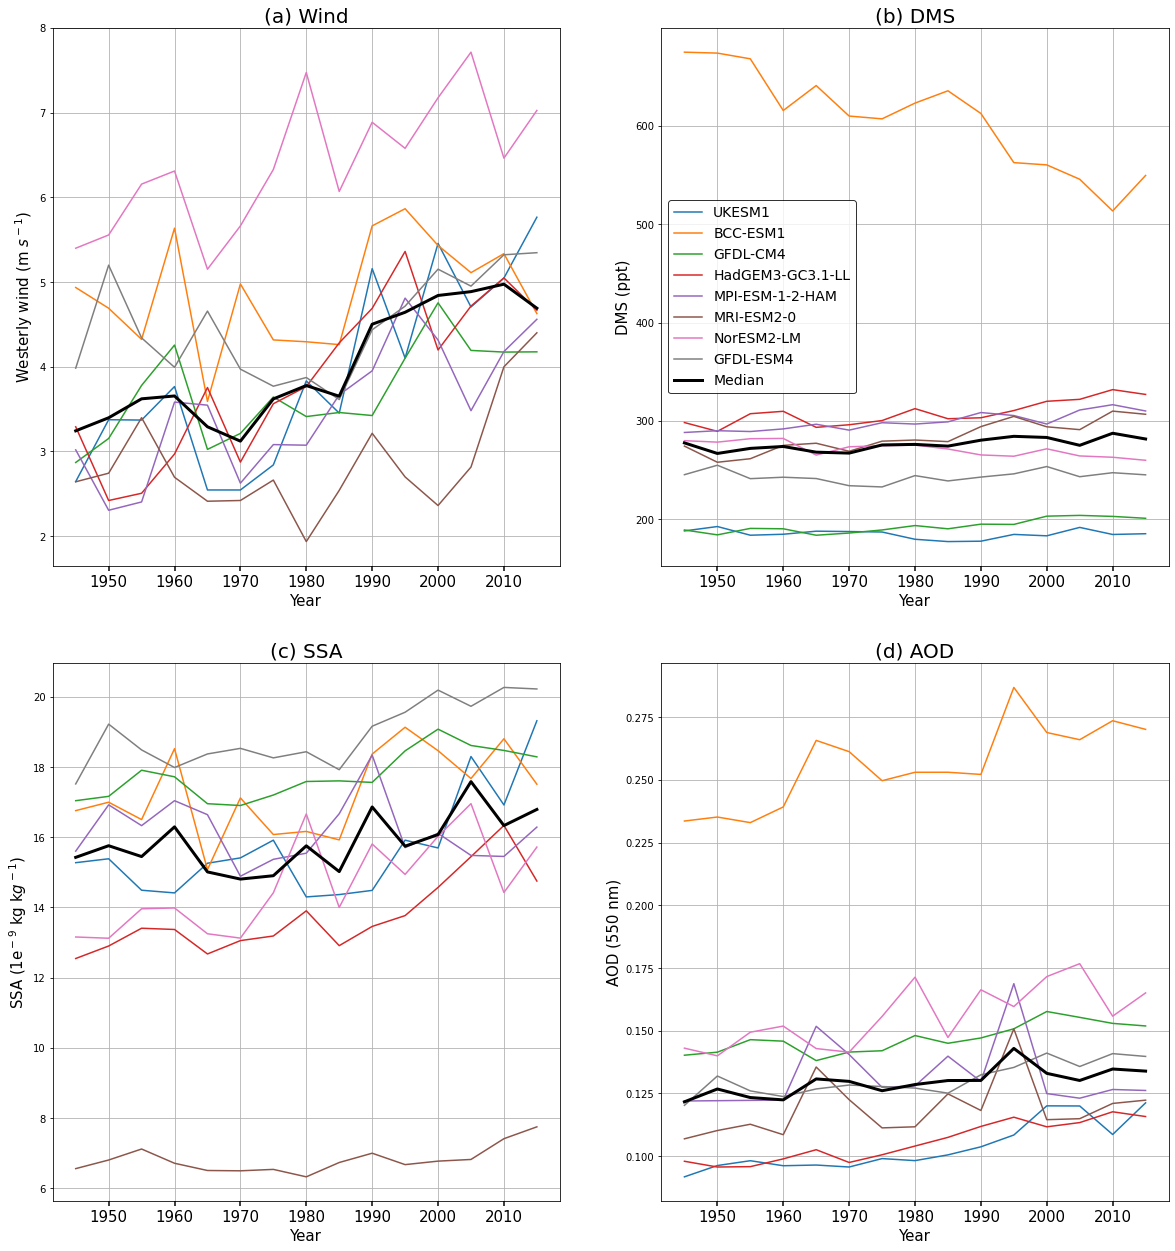

In [151]:
#################################################################################################################################
########################################################## FIGURE 4 ##############################################################
#################################################################################################################################
import copy

def standard(data):
    serror=np.std(data)
    pos_err=data+serror
    neg_err=data-serror
    if np.ndim(data)==2 !=-1:
        positive=np.nanmean(pos_err,axis=0)
        negative=np.nanmean(neg_err,axis=0)
    return positive, negative

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_in= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_in= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,len(nums),75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,len(data_in)):
        for i,l in zip(nums,range(0,len(nums))):
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
            if t == 0:
                print('models = {}'.format(models[i]))


data_for_fig4=[data_in[4],data_in[1],data_in[3]*1e9,data_in[0]] # 'SSA','AOD','DMS_SSA','DMS_SSA'

measurement=['(a) Wind','(b) DMS','(c) SSA','(d) AOD']
units=['Westerly wind (m $s^-$$^1$)','DMS (ppt)','SSA (1e$^-$$^9$ kg k$g^-$$^1$)', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']

models_in_indirect=model_var[0:8]

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.2)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]

lower_lat=22
upper_lat=28
for axe,data,var_of_interest,var,models_ in zip(axes,data_for_fig4,measurement,units,models_in_indirect):
    axe.grid()
    year_5=np.arange(1940,2021,5)
    year1=np.arange(1940,2016,1)
    axe.set_title('{}'.format(var_of_interest),fontsize=20)

    median_data=np.nanmedian(data[:,:,lower_lat:upper_lat],axis=(2,3))
   # mean_data=np.nanmean(data[:,:,lower_lat:upper_lat],axis=(2,3))
    cmip6_data=np.nanmedian(data[:,:,lower_lat:upper_lat],axis=(2,3))

#    five_mean=np.zeros((8,17)); five_mean[:]=np.nan
    five_median=np.zeros((8,17)); five_median[:]=np.nan
    five_cmip6=np.zeros((8,17)); five_cmip6[:]=np.nan

    fives=np.arange(0,76+5,5)
    for i in (range(0,len(five_mean))):
        for t in (range(0,16)):
            five_cmip6[i,t+1]=np.nanmean(median_data[i,fives[t]:fives[t+1]],axis=0)
            five_median[i,t+1]=np.nanmedian(median_data[i,fives[t]:fives[t+1]],axis=0)

#     a=np.nanpercentile(five_median,84,axis=0)
#     b=np.nanpercentile(five_median,16,axis=0)
    labely=['UKESM1','BCC-ESM1','GFDL-CM4','HadGEM3-GC3.1-LL','MPI-ESM-1-2-HAM','MRI-ESM2-0','NorESM2-LM','GFDL-ESM4','Median']
    DMS_error=np.nanmean(data[:,:,lower_lat:upper_lat],axis=(2,3))
    DMS_Error=standard(DMS_error)
    for i in range(0,len(nums)):

  #      print(var_of_interest)
#         if var_of_interest == 'Total Column Ozone':
#             pass
#         else:
#             print(model_var[i])
#             print(np.nanmedian(data[i,:,lower_lat:upper_lat]))
       
        #plot_data=np.nanmedian(data[i,:,lower_lat:upper_lat],axis=(1,2))
        #axe.plot(year1[:75],plot_data,'gray',alpha=1)#,label = "O3")
        axe.plot(year_5,five_cmip6[i],alpha=1,label=models_)#,label = "O3")
        ax1.legend(labely,loc='center left',fontsize=14,edgecolor='black')

  #  cmip6_mean=np.nanmean(five_mean[:,:],axis=(0))
    cmip6_median=np.nanmedian(five_median[:,:],axis=(0))


#     axe.plot(year_5,a,'b-.',label = "84th Percentile",linewidth=2.0)
#     axe.plot(year_5,b,'b-.',label = "16th Percentile",linewidth=2.0)
#     axe.plot(year_5,cmip6_mean,'k--',label = "Mean ",linewidth=3.0)
    axe.plot(year_5,cmip6_median,'k',label = "Median",linewidth=3.0)


    axe.set_ylabel("{}".format(var),fontsize=15)
    axe.set_xlabel("Year",fontsize=15)



    tkw = dict(size=5, width=1.5)

 #   axe.set_ylim(190,430)
    axe.tick_params(axis='x', **tkw,labelsize=15)
  #  plt.suptitle("CMIP6 MMM during {} with Standard Deviation Limits ({:.1f}{:.1f}S)".format(Season_type,lats[lower_lat].data,lats[upper_lat].data), size=20)
    fig.subplots_adjust(top=0.94)


#plt.show()
plt.savefig("/home/ybh10/CMIP6/Figures/Supplimentary_Time_Series_CMIP6_Models_Indirect_5_yr_low_res.png".format(Season_type),dpi=150,bbox_inches = 'tight')


models = UKESM1
models = BCC
models = GFDL-CM4
models = HadGEM3
models = MPI
models = MRI-ESM2-0
models = NorESM2-LM
models = GFDL-ESM4


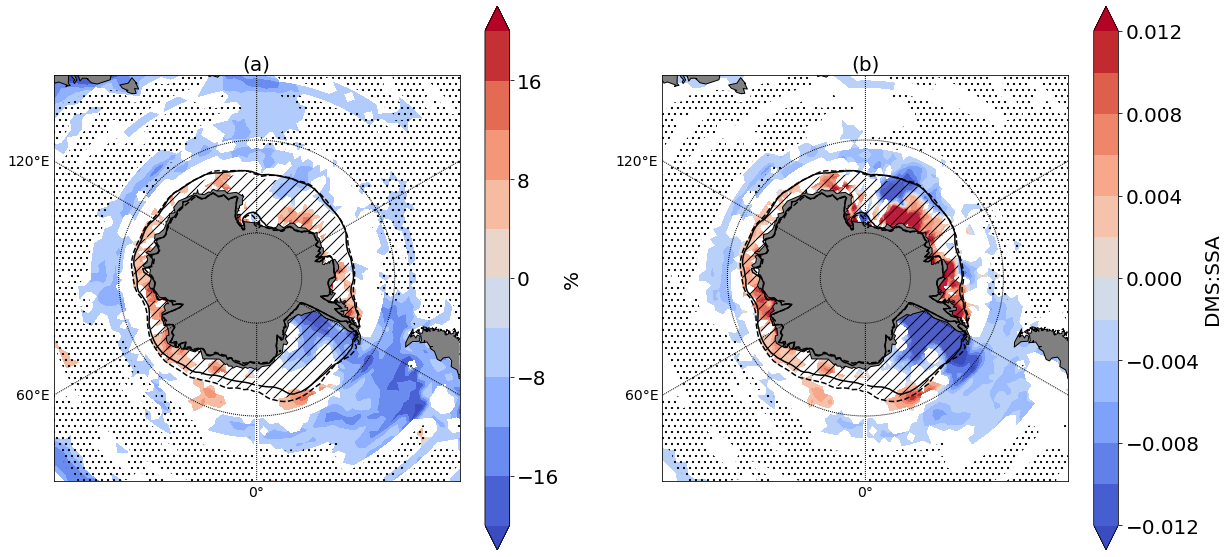

In [204]:
#################################################################################################################################
########################################################## Supplimentary Figure: DMS_SSA ##############################################################
#################################################################################################################################
import copy

def standard(data):
    serror=np.std(data)
    pos_err=data+serror
    neg_err=data-serror
    if np.ndim(data)==2 !=-1:
        positive=np.nanmean(pos_err,axis=0)
        negative=np.nanmean(neg_err,axis=0)
    return positive, negative

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_in= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_in= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,len(nums),75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,len(data_in)):
        for i,l in zip(nums,range(0,len(nums))):
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
            if t == 0:
                print('models = {}'.format(models[i]))
model_var=model_var[:8]
sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))

seayy=data_in[2]
nums=[0,1,2,3,4,6,7]
seay=np.zeros((7,75,144,192)) ;  seay[:]=np.nan
for i,l in zip(nums,range(0,7)):
    seay[l]=seayy[i]
sea_ice=np.nanmedian(seay,axis=0)

measurement=['(a)','(b)']
units=['Westerly wind (m $s^-$$^1$)','DMS (ppt)']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_DJF_MEDIAN.npy')[5]
dms_ssa_ref=np.load('/home/ybh10/CMIP6/Indirect/Rel_Diff/Relative_Difference_Indirect_Dataset_DJF_MEDIAN.npy')[5]

dms_ssa_dot=np.load('/home/ybh10/CMIP6/Indirect/Dots/DJF_Spatial_Dots_MEDIAN.npy')[5]
clevys_dmsssa_minus=np.arange(-.012,.012+0.002,.002)
shifted_cmap_dm_ssa = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
clevs_rel_rssa_dms=np.arange(-20,20+4,4)

clevys=[clevs_rel_rssa_dms,clevys_dmsssa_minus]
data_for_fig4=[dms_ssa_ref,dms_ssa] # 'SSA','AOD','DMS_SSA','DMS_SSA'
data_dots_fig=[dms_ssa_dot,dms_ssa_dot]
models_in_indirect=model_var[0:8]

fig = plt.figure(figsize=(20,10), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.2)
ax = fig.add_subplot(1,2,1); ax1 = fig.add_subplot(1,2,2)
axes=[ax,ax1]
units=['%','DMS:SSA']
lower_lat=23
upper_lat=28
for axe,data,num,models_,clev,unit in zip(axes,data_for_fig4,measurement,model_var,clevys,units):
    axe.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(data[-21:],axis=(0))
    sic=np.nanmean(sea_ice[:21],axis=(0))
    sic_new=np.nanmean(sea_ice[-21:],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-47, lon_0=0,
                    resolution ='c',ax=axe)
#    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')

    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice
   
    year_5=np.arange(1940,2021,5)
    year1=np.arange(1940,2016,1)

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    map_ax1.fillcontinents(color='gray')
    if num == measurement[0]:
        vari=blank_space(mapy,-4,4)
        cs=map_ax1.contourf(x,y,vari,clev,cmap=shifted_cmap_dm_ssa,extend='both')
    else:
        vari=blank_space(mapy,-0.002,0.002)
        cs=map_ax1.contourf(x,y,vari,clev,cmap=shifted_cmap_dm_ssa,extend='both')
    sea_ice_grid=15
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,sea_ice_grid)
    map_ax1.contour(x,y,sic,levels=[sea_ice_grid],linestyles='dashed',colors='black',vmax=10000)
    map_ax1.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,sea_ice_grid)
    map_ax1.contour(x,y,sic_new,levels=[sea_ice_grid],alpha=1,colors='black',vmax=10000)
    var = np.where(sic>0,np.nan,dms_ssa_dot)#mask sea ice
    [m,n] = np.where(var==1)
    z1 = np.zeros(var.shape)
    z1[m,n]=99
    cs3 = map_ax1.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    cbar=fig.colorbar(cs,ax=axe)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    axe.set_title('{}'.format(num),fontsize=20)

 #   axe.set_ylim(190,430)
  #  plt.suptitle("CMIP6 MMM during {} with Standard Deviation Limits ({:.1f}{:.1f}S)".format(Season_type,lats[lower_lat].data,lats[upper_lat].data), size=20)


plt.show()

#plt.savefig("/home/ybh10/CMIP6/Figures/Supplimentary_DMS_SSA_{}.png".format(Season_type),dpi=150,bbox_inches = 'tight')


models = UKESM1
models = BCC
models = GFDL-CM4
models = HadGEM3
models = MPI
models = MRI-ESM2-0
models = NorESM2-LM
models = GFDL-ESM4


<ipython-input-7-a2c8aea5c6d2>:94: RuntimeWarning: Mean of empty slice
  five_mean[i,t+1]=np.nanmean(mean_data[i,fives[t]:fives[t+1]],axis=0)
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-7-a2c8aea5c6d2>:107: RuntimeWarning: Mean of empty slice
  cmip6_mean=np.nanmean(five_mean[:,:],axis=(0))
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


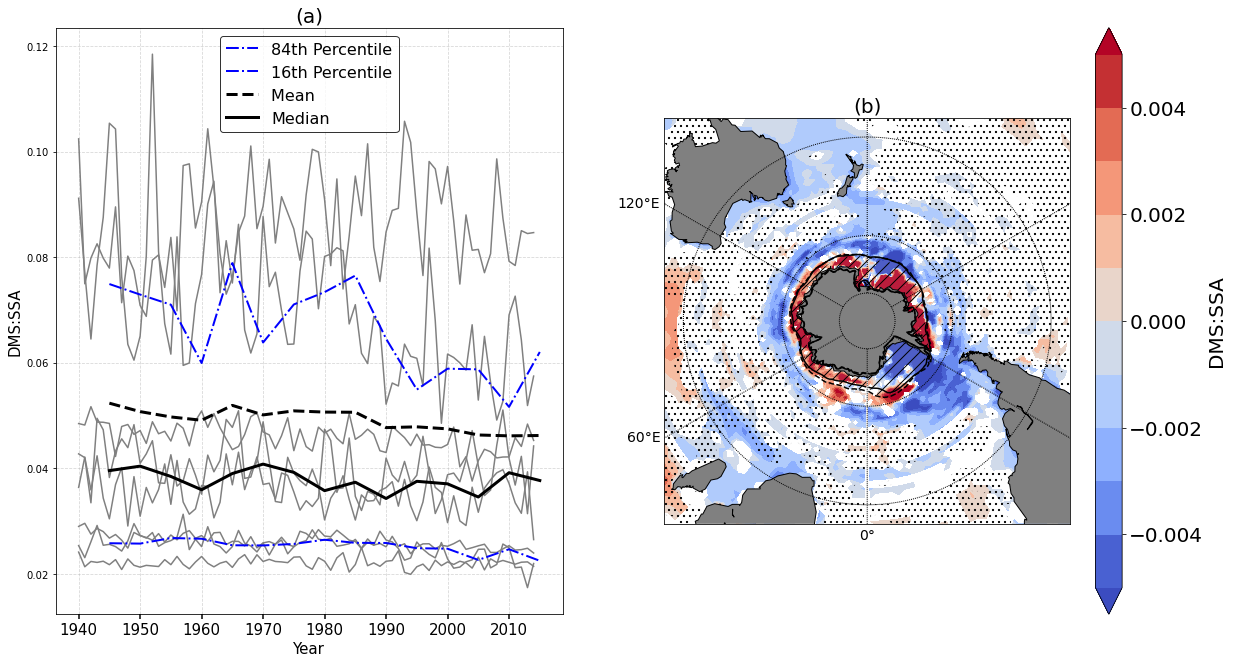

In [7]:
#################################################################################################################################
########################################################## Supplimentary Figure: DMS_SSA ##############################################################
#################################################################################################################################
import copy

def standard(data):
    serror=np.std(data)
    pos_err=data+serror
    neg_err=data-serror
    if np.ndim(data)==2 !=-1:
        positive=np.nanmean(pos_err,axis=0)
        negative=np.nanmean(neg_err,axis=0)
    return positive, negative

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_in= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_in= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,len(nums),75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,len(data_in)):
        for i,l in zip(nums,range(0,len(nums))):
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
            if t == 0:
                print('models = {}'.format(models[i]))
model_var=model_var[:8]
sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))

seayy=data_in[2]
nums=[0,1,2,3,4,6,7]
seay=np.zeros((7,75,144,192)) ;  seay[:]=np.nan
for i,l in zip(nums,range(0,7)):
    seay[l]=seayy[i]
sea_ice=np.nanmedian(seay,axis=0)

measurement=['(a)','(b)']
units=['Westerly wind (m $s^-$$^1$)','DMS (ppt)']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_DJF_MEDIAN.npy')[5]
dms_ssa_dot=np.load('/home/ybh10/CMIP6/Indirect/Dots/DJF_Spatial_Dots_MEDIAN.npy')[5]
clevys_dmsssa_minus=np.arange(-.005,.005+0.001,.001)
shifted_cmap_dm_ssa = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 

data_for_fig4=[data_in[5],dms_ssa] # 'SSA','AOD','DMS_SSA','DMS_SSA'
data_dots_fig=[dms_ssa_dot,dms_ssa_dot]
models_in_indirect=model_var[0:8]

fig = plt.figure(figsize=(20,10), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.2)
ax = fig.add_subplot(1,2,1); ax1 = fig.add_subplot(1,2,2)
axes=[ax,ax1]

lower_lat=23
upper_lat=28
for axe,data,num,models_ in zip(axes,data_for_fig4,measurement,model_var):
    axe.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(data[-21:],axis=(0))
    sic=np.nanmean(sea_ice[:21],axis=(0))
    sic_new=np.nanmean(sea_ice[-21:],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=axe)
#    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')

    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice
   
    year_5=np.arange(1940,2021,5)
    year1=np.arange(1940,2016,1)

    if num == measurement[0]:
        median_data=np.nanmedian(data[:,:,lower_lat:upper_lat],axis=(2,3))
        mean_data=np.nanmean(data[:,:,lower_lat:upper_lat],axis=(2,3))
        five_mean=np.zeros((8,17)); five_mean[:]=np.nan
        five_median=np.zeros((8,17)); five_median[:]=np.nan

        fives=np.arange(0,76+5,5)
        for i in (range(0,len(five_mean))):
            for t in (range(0,16)):
                five_mean[i,t+1]=np.nanmean(mean_data[i,fives[t]:fives[t+1]],axis=0)
                five_median[i,t+1]=np.nanmedian(median_data[i,fives[t]:fives[t+1]],axis=0)

        a=np.nanpercentile(five_median,84,axis=0)
        b=np.nanpercentile(five_median,16,axis=0)

        DMS_error=np.nanmean(data[:,:,lower_lat:upper_lat],axis=(2,3))
        DMS_Error=standard(DMS_error)
        for i in range(0,len(model_var)):
            plot_data=np.nanmedian(data[i,:,lower_lat:upper_lat],axis=(1,2))

            axe.plot(year1[:75],plot_data,'gray',alpha=1)#,label = "O3")

        cmip6_mean=np.nanmean(five_mean[:,:],axis=(0))
        cmip6_median=np.nanmedian(five_median[:,:],axis=(0))

        axe.plot(year_5,a,'b-.',label = "84th Percentile",linewidth=2.0)
        axe.plot(year_5,b,'b-.',label = "16th Percentile",linewidth=2.0)
        print
        axe.plot(year_5,cmip6_mean,'k--',label = "Mean ",linewidth=3.0)
        axe.plot(year_5,cmip6_median,'k',label = "Median",linewidth=3.0)


        axe.set_ylabel("DMS:SSA".format(var),fontsize=15)
        axe.set_xlabel("Year",fontsize=15)
        tkw = dict(size=5, width=1.5)

        axe.tick_params(axis='x', **tkw,labelsize=15)

        fig.subplots_adjust(top=0.94)
        axe.legend(fontsize=16,edgecolor='black')
        axe.set_title('{}'.format(num),fontsize=20)

    else:
        meridians = np.arange(0.,360,60.)    
        parallels = np.arange(-90.,90,30.)
        map_ax1.drawcoastlines()
        map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
        map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
        map_ax1.fillcontinents(color='gray')
             
        vari=blank_space(mapy,-0.0005,0.0005)
        cs=map_ax1.contourf(x,y,vari,clevys_dmsssa_minus,cmap=shifted_cmap_dm_ssa,extend='both')

        sea_ice_grid=15
        sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,sea_ice_grid)
        map_ax1.contour(x,y,sic,levels=[sea_ice_grid],linestyles='dashed',colors='black',vmax=10000)
        map_ax1.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)

        new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,sea_ice_grid)
        map_ax1.contour(x,y,sic_new,levels=[sea_ice_grid],alpha=1,colors='black',vmax=10000)
        var = np.where(sic>0,np.nan,dms_ssa_dot)#mask sea ice
        [m,n] = np.where(var==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = map_ax1.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
        cbar=fig.colorbar(cs,ax=axe)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
        cbar.set_label('DMS:SSA',fontsize=20)
        cbar.ax.tick_params(labelsize=20)
        axe.set_title('{}'.format(num),fontsize=20)

 #   axe.set_ylim(190,430)
  #  plt.suptitle("CMIP6 MMM during {} with Standard Deviation Limits ({:.1f}{:.1f}S)".format(Season_type,lats[lower_lat].data,lats[upper_lat].data), size=20)


#plt.show()
plt.savefig("/home/ybh10/CMIP6/Figures/Supplimentary_DMS_SSA_{}.png".format(Season_type),dpi=150,bbox_inches = 'tight')


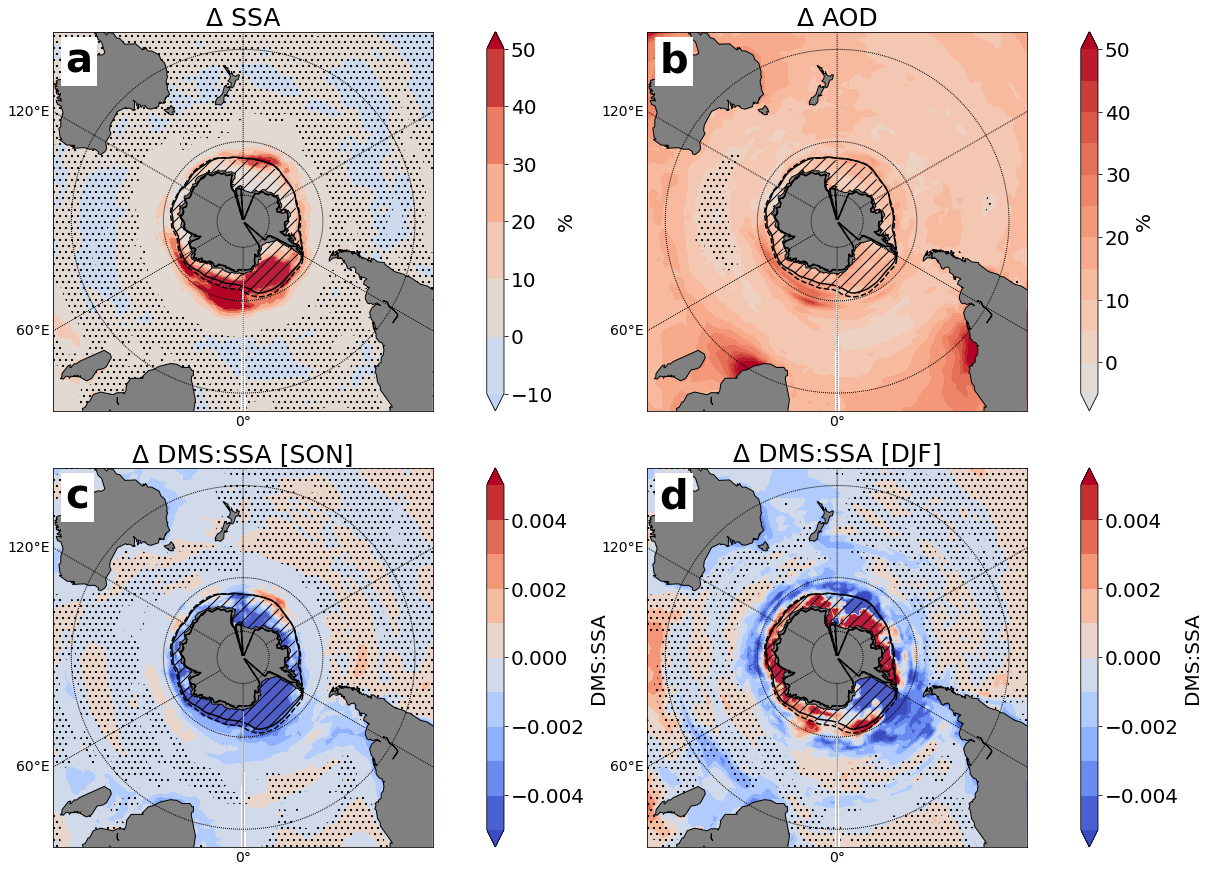

In [100]:
#(rows, columns, position) #  

month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['SSAMMR','AOD','DMS_SSA_minus_Abs_Diff','DMS_SSA_minus_Abs_Diff'] 

data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)

month='DJF'   
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['SSAMMR','AOD','DMS_SSA_minus_Abs_Diff','DMS_SSA_minus_Abs_Diff'] 
data_percentage_d,data_dot_d,data_clev_d,data_shift_d=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)

    
clevs_dms_ssa=np.arange(-60,60+10,10) # DMS
clevs_ssa=np.arange(-10,50+10,10) # DMS
clevys_dmsssa_minus=np.arange(-.005,.005+0.001,.001)
clevs_aod=np.arange(-5,50+5,5) # DMS


shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_SSA = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.6, stop=1, name='shifted') 
shifted_cmap_dm_ssa = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 


DATA=[data_percentage[0],data_percentage[1],data_percentage[2],data_percentage_d[3]]
DOT=[data_dot[0],data_dot[1],data_dot[2],data_dot_d[3]]
CLEV=[clevs_ssa,clevs_aod,clevys_dmsssa_minus,clevys_dmsssa_minus]
SHIFT=[shifted_cmap_SSA,shifted_cmap_AOD,shifted_cmap_dm_ssa,shifted_cmap_dm_ssa]

fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=-0.45)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['SSA','AOD','DMS:SSA [SON]','DMS:SSA [DJF]'] # Fig 2

data_file=np.load('/home/ybh10/CMIP6/Indirect/Rel_Diff/Relative_Difference_Indirect_Dataset_SON_MEDIAN.npy')
data_file_2=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_SON_MEDIAN.npy')
data_file_3=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_DJF_MEDIAN.npy')[5]

dot_file_wind=np.load('/home/ybh10/CMIP6/Indirect/Dots/SON_Spatial_Dots_MEDIAN.npy')
dot_file_wind_2=np.load('/home/ybh10/CMIP6/Indirect/Dots/DJF_Spatial_Dots_MEDIAN.npy')[5]

dot_file=np.load('/home/ybh10/CMIP6/Direct/Dots/SON_Spatial_Dots_MEDIAN.npy')

data_for_fig4=[data_file[3],data_file[0],data_file_2[5],data_file_3] # 'SSA','AOD','DMS_SSA','DMS_SSA'
data_dots_for_fig4=[dot_file_wind[3],dot_file_wind[0],dot_file_wind[5],dot_file_wind_2] # 'SSA','AOD','DMS_SSA','DMS_SSA'

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/SON/Sea_Ice_SON_model_mean.npy')
sea_ice=np.nanmean(data_in[2],axis=0)

# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
#surface_downwelling_shortwave_flux_in_air

#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['%','%','DMS:SSA','DMS:SSA']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/DMS_SSA.npy'.format(month))
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[latmesh,latmesh,latmesh,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lonmesh,lonmesh,lonmesh,lonmesh]#,olon.data,olon.data,lonmesh,lonmesh,lonmesh]
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')


data_shift=[shifted_cmap_Wind,shifted_cmap_dms,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,data_fig,sig_dot,clev,shift,title,unit,num in  zip(axes,data_for_fig4,data_dots_for_fig4,CLEV,SHIFT,measurement,units,number):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(data_fig[-21:],axis=(0))
    sic=np.nanmean(sea_ice[:21],axis=(0))
    sic_new=np.nanmean(sea_ice[-21:],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)

    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x,y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.fillcontinents(color='gray')
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='SSA'!=-1:
        vari=blank_space(mapy,-2.5,2.5)
        cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')

    else: 
        if title=='AOD':
            vari=blank_space(mapy,-5,5)
            cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
        else:
            if title=='DMS:SSA [SON]':
                vari=blank_space(mapy,-0.001,0.001)
                cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-0.0005,0.0005)
                cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
#     if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
#         pass
#     else:
    lol=15
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,lol)
    ax.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)
    ax.contour(x,y,sic,levels=[lol],linestyles='dashed',colors='black',vmax=10000)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,lol)
    ax.contour(x,y,sic_new,levels=[lol],alpha=1,colors='black',vmax=10000)
    
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    if title=='Wind' !=-1:
     #   var = np.where(sic,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(sig_dot==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
    else:
        var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(var==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    

plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/Fig_4_SEA_ICE_contour_15_MEDIAN.png",dpi=600,bbox_inches = 'tight')


models = UKESM1
models = BCC
models = GFDL-CM4
models = HadGEM3
models = MPI
models = MRI-ESM2-0
models = NorESM2-LM
models = GFDL-ESM4
Wind
UKESM1
4.2734375
Wind
BCC
5.320756435394287
Wind
GFDL-CM4
4.074961185455322
Wind
HadGEM3
4.3427734375
Wind
MPI
3.971294641494751
Wind
MRI-ESM2-0
3.200999617576599
Wind
NorESM2-LM
6.829036235809326
Wind
GFDL-ESM4
4.822120666503906
cmip6_mean = 4.478880036958069
cmip6_median = 4.544453144073486
-----------------
DMS
UKESM1
191.5201187133789
DMS
BCC
590.6383666992188
DMS
GFDL-CM4
188.23519134521484
DMS
HadGEM3
309.20359802246094
DMS
MPI
296.1759033203125
DMS
MRI-ESM2-0
284.86610412597656
DMS
NorESM2-LM
269.3392333984375
DMS
GFDL-ESM4
242.05205535888672
cmip6_mean = 307.0847795633938
cmip6_median = 268.69873046875
-----------------
SSA
UKESM1
1.6429432037057268e-08
SSA
BCC
1.851058861745969e-08
SSA
GFDL-CM4
1.8247404476312568e-08
SSA
HadGEM3
1.4349520682799266e-08
SSA
MPI
1.695559781467182e-08
SSA
MRI-ESM2-0
6.999850254985063e-09
SSA
NorESM2-LM
1.5460

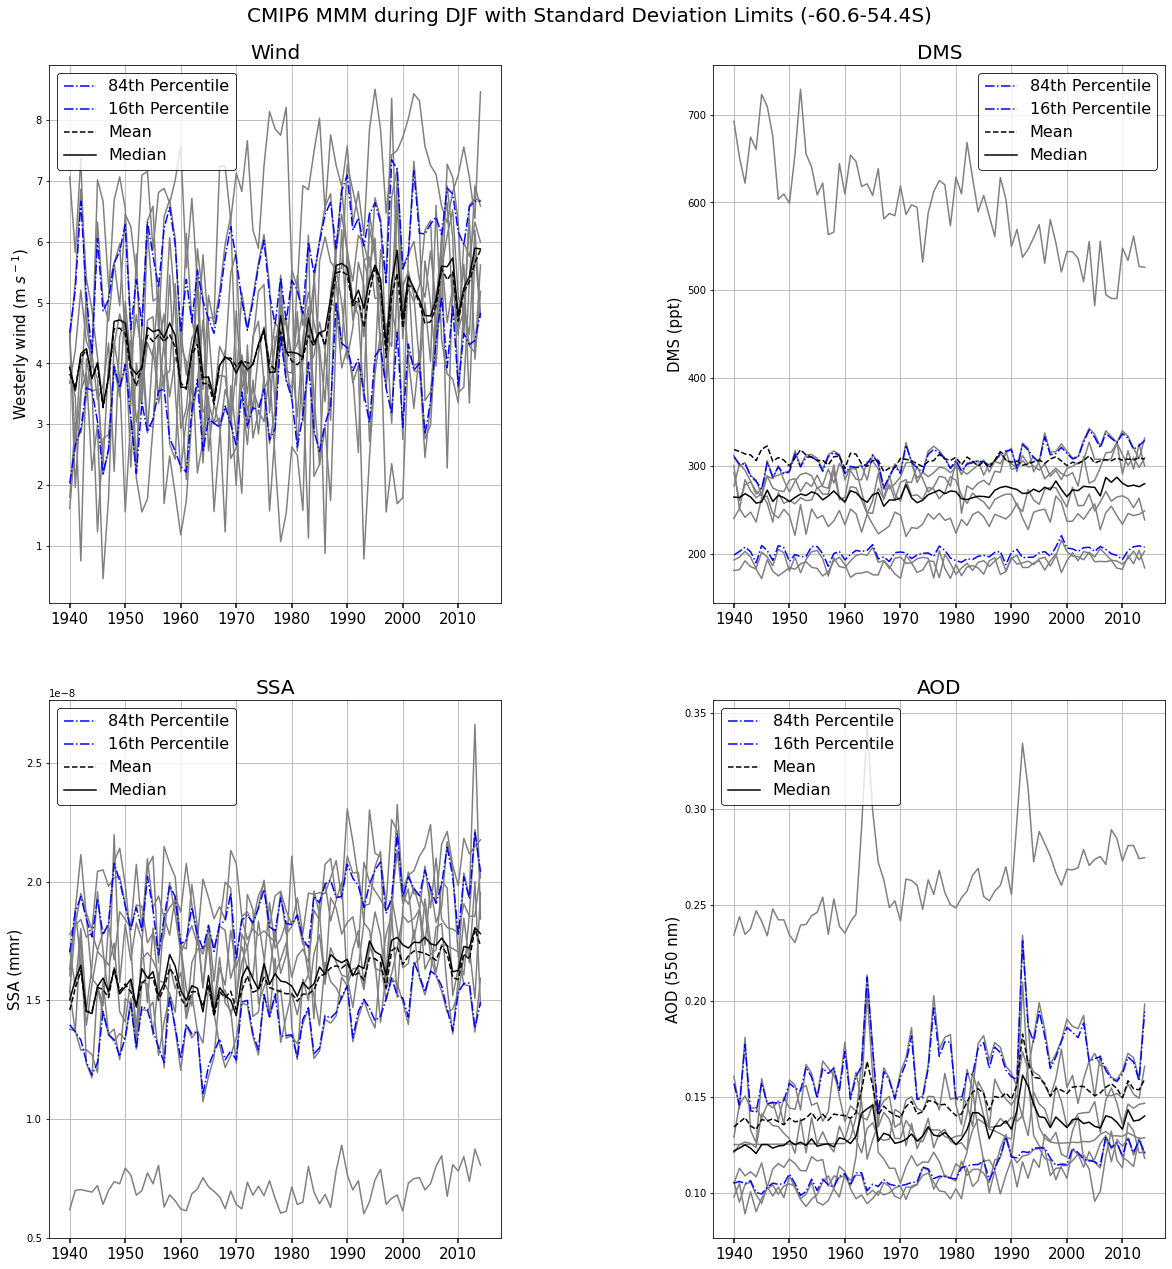

In [6]:
Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='SON'           ######## CHANGABLE ATTRIBUTION ########

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))

nums=[0,1,3,4,5,6,7,9,11]
seay=np.zeros((len(nums),75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,len(nums))):
    seay[l]=sea_ice_file[i]
sea_ice=np.nanmedian(seay,axis=0)
#sea_ice=seay[0]

def sea_ice_bias(data,pre_num,post_num,sea_ice_data):
    sic_new=np.nanmedian(sea_ice_data[-post_num:],axis=(0))
#     pre=np.nanmedian(data[:,:pre_num],axis=(1))
    post=np.nanmedian(data[-post_num:],axis=(0))
#     var_old = np.where(sic==0,np.nan,pre)#mask sea ice
    var_new = np.where(sic_new==0,np.nan,post)#mask sea ice
#     model_diff=var_new-var_old
    return var_new
def for_sea_ice(data,pre_num,post_num,sea_ice_data):
    sic=np.nanmedian(data[:pre_num],axis=(0))
    sic_new=np.nanmedian(data[-post_num:],axis=(0))
    var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    var_old = np.where(sic==0,np.nan,sic)#mask sea ice
    model_diff=var_new-var_old
    return model_diff

sic=np.nanmean(sea_ice[:21],axis=(0))
sic_new=np.nanmean(sea_ice[-21:],axis=(0))
var_old = np.where(sic==0,np.nan,sic)#mask sea ice
var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
var_diff=var_new-var_old


data_file=np.load('/home/ybh10/CMIP6/Indirect/Rel_Diff/Relative_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Season_type))

sea_ice_cmip6_diff=sea_ice_bias(sea_ice,21,21,sea_ice)
model_bias=var_diff-HAD_diff[3]
aod_cmip6_diff=sea_ice_bias(data_file[0],21,21,sea_ice)
dms_cmip6_diff=sea_ice_bias(data_file[1],21,21,sea_ice)
ssa_cmip6_diff=sea_ice_bias(data_file[3],21,21,sea_ice)


data_set=[var_diff,HAD_diff[3],model_bias,aod_cmip6_diff,dms_cmip6_diff,ssa_cmip6_diff]
titles=['CMIP6 Sea Ice','HADISST Ice','CMIP Bias','AOD','DMS','SSA']    

titles=['MODEL (1995-2014 MINUS 1940-60)',
       'HADISST (1995-2009 - MINUS 1940-60)',
       'MODEL MINUS \u0394 HADISST (Model Bias)']
units=['%','Wind','%','%','%','%']#,'RF-CS (W $m^-$$^2$)']

clevs_SON_Sea_ice=np.arange(-40,40+10,10)   

orig_cmap = matplotlib.cm.coolwarm

shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.12, stop=.55, name='shifted') 
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 

clevy=[clevs_SON_Sea_ice,clevs_SON_Sea_ice,clevs_SON_Sea_ice]
dats_shifty=[shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice]

orig_cmap = matplotlib.cm.coolwarm
fig = plt.figure(figsize=(30,30), edgecolor='w')
fig.subplots_adjust(hspace=0.1)
n=3; c=1
sh_lat=lats[10:40]

#measurement=['Oceanic DMS','Atmospheric DMS','CHEG','Oceanic DMS','Atmospheric DMS','CHEG']
data_percentage=[var_diff[130:],HAD_diff[3][130:],model_bias[130:]]
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3)#;ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3]
latit=[HAD_lat[130:],HAD_lat[130:],HAD_lat[130:]]
lonit=[HAD_lon,HAD_lon,HAD_lon]
leve=np.arange(-50,0,25)
for ax,mapy,clevs,shifts,laty,lony,titl in zip(axes,data_set,clevy,dats_shifty,latit,lonit,titles):
#     sic=np.nanmean(seay_ice[90:111],axis=(0))
#     sic_new=np.nanmean(seay_ice[145::],axis=(0))
    ax.grid(linestyle='--',alpha=0.5)
#     var_old = np.where(sic==0,np.nan,sic)#mask sea ice
#     var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    ax.set_ylabel('Latitude',fontsize=20)
    y_labels = ['80S','70S','60S','50S','40S']
    y=np.arange(-80,-40+10,10)

    ax.set_yticks(y); ax.set_yticklabels(y_labels,fontsize=15)

#     x, y = map_ax1(lons, lats) le
    ax.set_title("\u0394 {}".format(titl),fontsize=25)

    #ax.set_title("\u0394 {}".format('Sea Ice'),fontsize=25)
    cs=ax.contourf(lons,lats[7:30],mapy[7:30],clevs,cmap=shifts,extend='both')#,levels=levels)
   # ts=ax.contour(lony,HAD_lat,var_diff,levels=leve)

  #  ax.clabel(ts, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
#    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
plt.suptitle('Sea Ice Difference of SEA ICE ',y=.95,x=.5,fontsize=40)

plt.show()

percentile_16 = 325.51292388361696
percentile_86 = 415.3048247098923
UKESM1
5.578562
-----------------
NorESM2-LM
8.3307705
-----------------
MIROC-ES2L
2.096166
-----------------
percentile_16 = 2.6387338961919147
percentile_86 = 8.936877250671385
UKESM1
2.1265335
-----------------
NorESM2-LM
0.3531906
-----------------
MIROC-ES2L
0.7651205
-----------------
percentile_16 = 0.3224645360628764
percentile_86 = 3.1940372848510745
UKESM1
102.43502
-----------------
NorESM2-LM
33.591816
-----------------
MIROC-ES2L
56.00535
-----------------
percentile_16 = 32.484099914550775
percentile_86 = 138.8998260498047


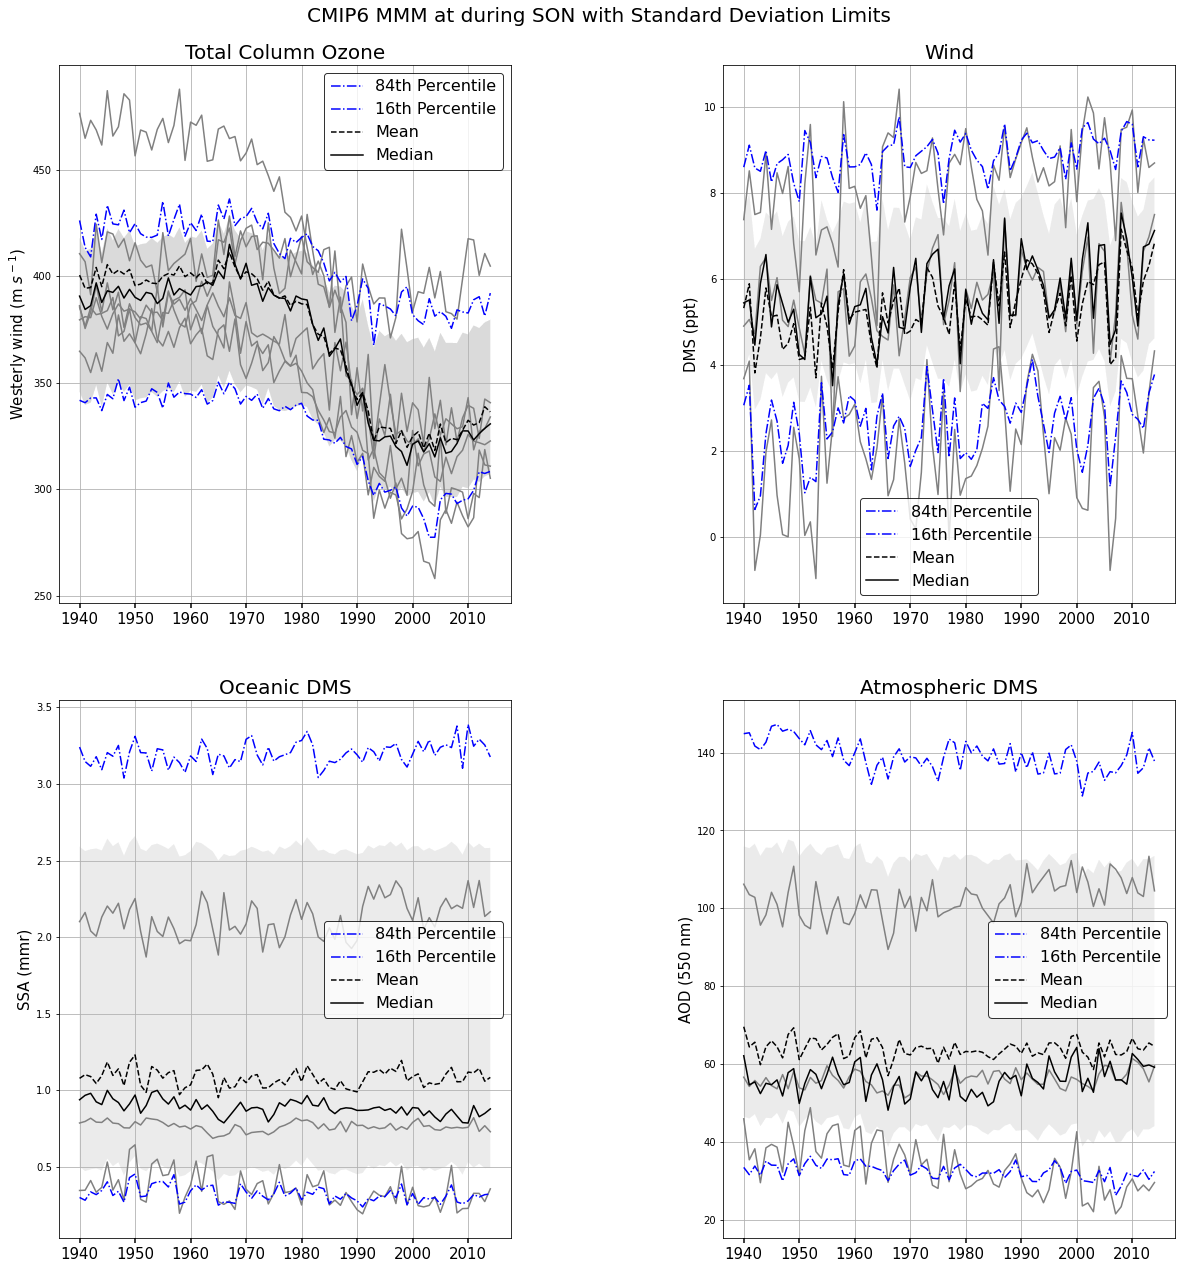

In [64]:
                                    ### AOD, DMS, OZONE LINE PLOT ###

def standard(data):
    serror=np.std(data)
    pos_err=data+serror
    neg_err=data-serror
    if np.ndim(data)==2 !=-1:
        positive=np.nanmean(pos_err,axis=0)
        negative=np.nanmean(neg_err,axis=0)
    return positive, negative

Direct_or_Indirect='Direct' ######## CHANGABLE ATTRIBUTION ########
Season_type='SON'           ######## CHANGABLE ATTRIBUTION ########




if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_in= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_in= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,len(nums),75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,len(data_in)):
        for i,l in zip(nums,range(0,len(nums))):
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
            if t == 0:
                print('models = {}'.format(models[i]))
# season_type='DJF'
# month_variable={}_var.format(season_type)
#   AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]

data_for_fig4=[data_in[2]*100000,data_in[3],data_in[0],data_in[1]] # 'SSA','AOD','DMS_SSA','DMS_SSA'

measurement=['Total Column Ozone','Wind','Oceanic DMS','Atmospheric DMS'] # Fig 2
units=['Westerly wind (m $s^-$$^1$)','DMS (ppt)','SSA (mmr)', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']

models_in_indirect=model_var[0:8]
# aa=DJF_SO2

#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
lower=23
upper=28
for axe,data,var_of_interest,var in zip(axes,data_for_fig4,measurement,units):
    axe.grid()
    year1=np.arange(1940,2015,1)

    axe.set_title('{}'.format(var_of_interest),fontsize=20)
    DMS_error=np.nanmean(data[:,:,lower_lat:upper_lat],axis=(2,3))
    DMS_Error=standard(DMS_error)
    for i in range(0,len(data)):
        
        plot_data=np.nanmean(data[i,:,lower:upper],axis=(1,2))
        axe.plot(year1,plot_data,'gray',alpha=1)

        axe.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='gray',alpha=0.05,)
    
        cmip6_mean=np.nanmean(data[:,:,lower:upper,:],axis=(0,2,3))
        percentile_86=np.nanpercentile(data[:,:,lower_lat:upper_lat],86,axis=(0,2,3))
        percentile_16=np.nanpercentile(data[:,:,lower_lat:upper_lat],16,axis=(0,2,3))

        if var_of_interest == 'Total Column Ozone':
            pass
        else:
            print(direct_models[i])
            print(np.nanmean(data[i,:,lower:upper]))
            print('-----------------')
    cmip6_mean=np.nanmean(data[:,:,lower:upper,:],axis=(0,2,3))
    cmip6_median=np.nanmedian(data[:,:,lower:upper,:],axis=(0,2,3))
    print('percentile_16 = {}'.format(np.nanmean(percentile_16)))
    print('percentile_86 = {}'.format(np.nanmedian(percentile_86)))

    axe.plot(year1,percentile_86,'b-.',label = "84th Percentile")
    axe.plot(year1,percentile_16,'b-.',label = "16th Percentile")
    axe.plot(year1,cmip6_mean,'k--',label = "Mean")
    axe.plot(year1,cmip6_median,'k',label = "Median")

#     axe.set_xlabel("Year",fontsize=15)
#     par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
#     par1.set_ylabel("AOD",fontsize=15)
#     # host.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
#     # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("{}".format(var),fontsize=15)


    #axe.yaxis.label.set_color(p1.get_color())
    axe.legend(fontsize=16,edgecolor='black')

    tkw = dict(size=5, width=1.5)
  #  axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
 
 #   axe.set_ylim(190,430)
    axe.tick_params(axis='x', **tkw,labelsize=15)
# {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     else:
#           plt.text(0.02,0.87,
#                  'Ozone-DMS $r^2$   = {} \n' 
#                  'Ozone-AOD $r^2$ = {} \n'
#                  'DMS-AOD $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
#                                                 str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
#                                                 str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
#                  ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
        
   # plt.title("     (50\N{DEGREE SIGN} - 65\N{DEGREE SIGN}S) ",fontsize=20)
#    plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("CMIP6 MMM at during {} with Standard Deviation Limits".format(Season_type), size=20)
    fig.subplots_adjust(top=0.94)
#     if seas == 'DJF' !=-1:
#         axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.003),edgecolor='black')
plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/{}_Time_Series_CMIP6_Models_Direct.png".format(Season_type),dpi=600,bbox_inches = 'tight')


first
first


<ipython-input-268-df3fa3f56a2f>:164: UserWarning: The following kwargs were not used by contour: 'label'
  cs = axe.contourf(Dates,lat_sh,datas,label=unit,extend='both')


first
first


<ipython-input-268-df3fa3f56a2f>:159: UserWarning: The following kwargs were not used by contour: 'label'
  cs = axe.contourf(Dates,lat_sh,datas*1e9,label=unit,extend='both')


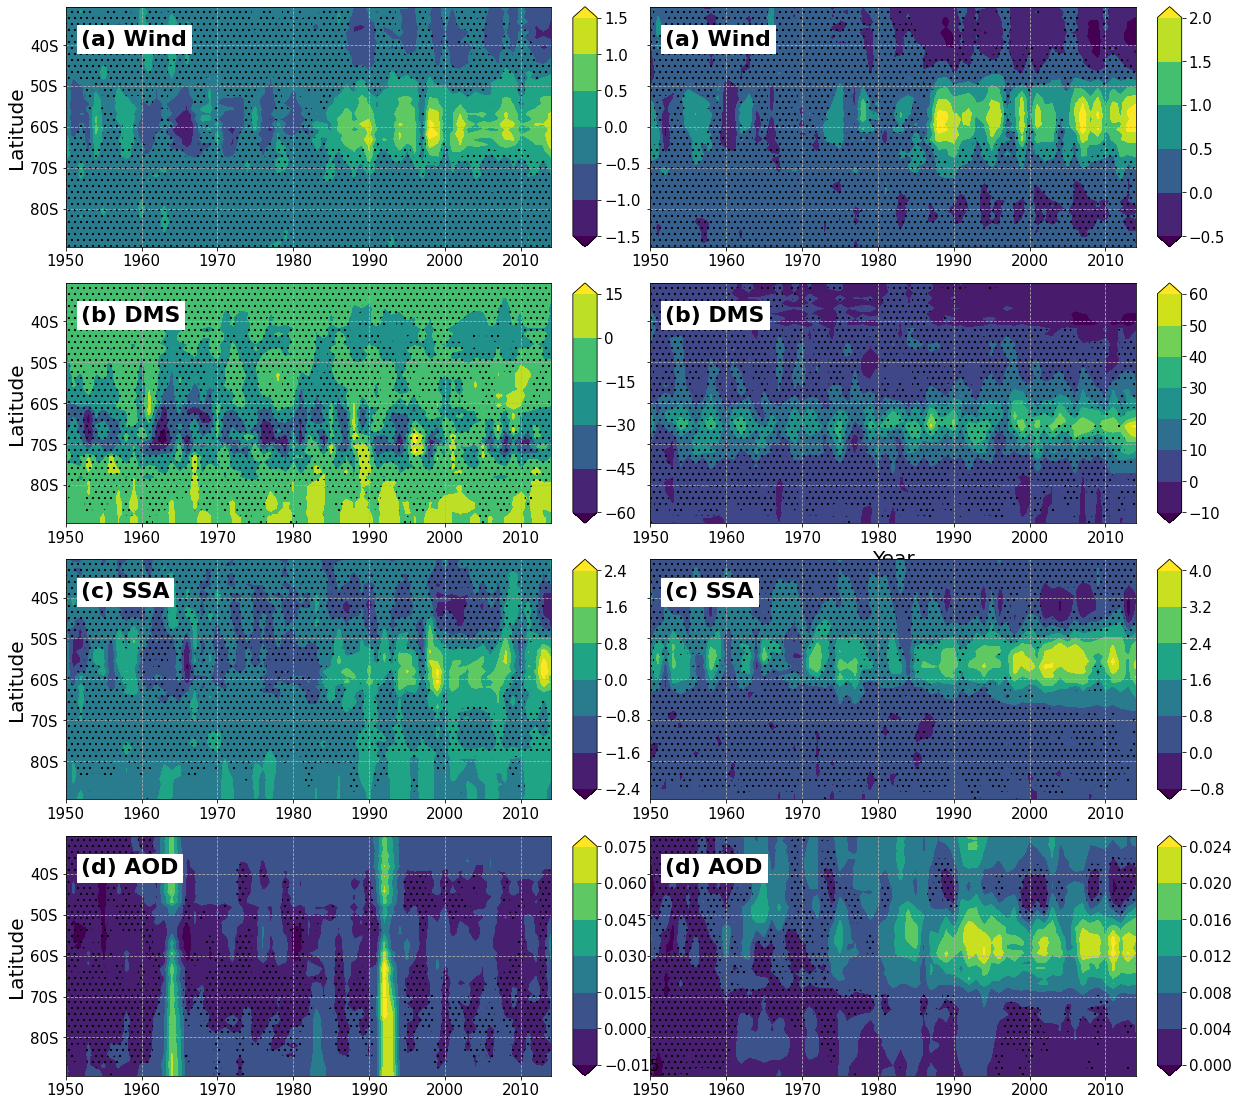

In [268]:
###################################################################################################
############################# SUPPLIMENTARY FIGURE 1 PERCENTILE ###################################
###################################################################################################

# -*- coding: utf-8 -*-
"""
Created on Wed Jun 10 13:34:01 2020
MODIFIED ON 01/03/22
@author: ybh10
"""
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

# s
dataset=[]

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,6):
        for i,l in zip(nums,range(0,8)):
            #print('models = {}'.format(models[i]))
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
            
measurement=['Wind','DMS','SSAMMR','AOD']
# data_percentage=[]
# data_dot=[]
data_clev=[]
data_shift=[]
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/DJF/'
saves=['AOD','DMS','ODMS','Ozone','RSDO','RSDS','RSS','SO2','SSAMMR','H2SO4MMR','RSDSCS','SSA_H2SO4','Wind']
month='DJF'
for i in range(0,len(measurement)):
#         a=np.load('{}{}.npy'.format(file,measurement[i]))
#         b=np.load('{}{}.npy'.format(file_dot,measurement[i]))
        c=np.load('{}/Clevs/{}_clev.npy'.format(file,measurement[i])) #put these clevs in dictionary along with each measurement and dot.
        #s=np.load('{}{}_shift.npy'.format(file_clev,measurement[i]), allow_pickle=True) # put these clevs in dictionary along with each measurement and dot.
#         data_percentage.append(a)
#         data_dot.append(b)
        data_clev.append(c)
# #        data_shift.append(s)
shift_month=[DJF_shift_abs,SON_shift_abs]
data_shift=shifty(measurement,saves,month,shift_month)
data_for_fig4=[data_in[4],data_in[1],data_in[3],data_in[0]] # 'SSA','AOD','DMS_SSA','DMS_SSA'



Indirect_variables_of_interest=['AOD','DMS','Sea_Ice','SSA_MMR','uas','DMS_SSA']
measurement=['Wind','Wind','DMS','DMS','SSA','SSA','AOD','AOD']
#data_abs=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_DJF_MEDIAN.npy')
PERCENTILE = 84
data_abs_84=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_DJF_MEDIAN_{}%.npy'.format(PERCENTILE))
data_dot_84=np.load('/home/ybh10/CMIP6/Indirect/Dots/DJF_Zonal_Dots_MEDIAN_{}%.npy'.format(PERCENTILE))

PERCENTILE = 16
data_abs_16=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_DJF_MEDIAN_{}%.npy'.format(PERCENTILE))
data_dot_16=np.load('/home/ybh10/CMIP6/Indirect/Dots/DJF_Zonal_Dots_MEDIAN_{}%.npy'.format(PERCENTILE))

data_for_fig1=[data_abs_84[4],data_abs_16[4],data_abs_84[1],data_abs_16[1],
               data_abs_84[3],data_abs_16[3],data_abs_84[0],data_abs_16[0]] # 'Wind','DMS','SSA','AOD'
data_dots_for_fig1=[data_dot_84[4],data_dot_16[4],data_dot_84[1],data_dot_16[1],
                    data_dot_84[3],data_dot_16[3],data_dot_84[0],data_dot_16[0]] # 'Wind','DMS','SSA','AOD'

lat_sh=lats[0:48]
fig = plt.figure(figsize=(20,40), edgecolor='w')
n=8
ax1 = fig.add_subplot(n,2,1); ax2 = fig.add_subplot(n,2,2); ax3 = fig.add_subplot(n,2,3);ax4 = fig.add_subplot(n,2,4);ax5 = fig.add_subplot(n,2,5);ax6 = fig.add_subplot(n,2,6);
ax7 = fig.add_subplot(n,2,7);ax8 = fig.add_subplot(n,2,8)
axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
plt.subplots_adjust(hspace=0.15, wspace=0.1)


wind_clev_16=np.arange(0,3.5+0.5,0.5)
dms_clev_16=np.arange(0,120+20,20)
ssa_clev_16=np.arange(0,7.5+1.5,1.5)
aod_clev_16=np.arange(0,0.06+0.01,0.01)

# data_clev=np.zeros(8)
# data_clev[3]=aod_clev_16
# data_clev[2]=ssa_clev_16
# data_clev[1]=dms_clev_16
# data_clev[0]=wind_clev_16
# data_clev[7]=aod_clev_16
# data_clev[6]=ssa_clev_16
# data_clev[5]=dms_clev_16
# data_clev[4]=wind_clev_16
orig_cmap = matplotlib.cm.coolwarm

#units=['Westerly wind (m s$^-$$^1$)','Westerly wind (m s$^-$$^1$)','DMS (ppt)','DMS (ppt)','(1e$^-$$^9$ kg kg$^-$$^1$)', '(1e$^-$$^9$ kg kg$^-$$^1$)','AOD (550 nm)','AOD (550 nm)']
units=['','Westerly wind (m s$^-$$^1$)','','DMS (ppt)','', '(1e$^-$$^9$ kg kg$^-$$^1$)','','AOD (550 nm)']

number=['a','a','b','b','c','c','d','d']
ssa_shift=shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
data_shift[1] = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
data_shift[0] = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
half = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.75, stop=1, name='shifted')

even=[2,0,2,0,2,0,2,0,2,0]

number_2=['','','','','','','','']

i=0
# 'Column Ozone (DU)',  'AOD (550 nm), W $m^-$$^2$'
for axe,text,unit,variable_check,uni,dotty in zip(axes,measurement,units,data_for_fig1,number,data_dots_for_fig1):
 #   dot=np.nanmean(dotty[10:],axis=(2))
    dot=dotty[10:]
    datas=np.nanmean(variable_check[:,:48],axis=(2)) 

    datas=np.array(datas)
    datas=datas.transpose(1,0)
    
    Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
    axe.grid(linestyle='--',alpha=1)
    
    if even[i] == 0:
        l=number_2[i]
    #    axe.set_ylabel('Latitude',fontsize=20)
        y=np.arange(-90,-30,10)
        axe.set_yticks(y); axe.set_yticklabels(l,fontsize=15)

    else:
        print('first')
        axe.set_ylabel('Latitude',fontsize=20)
        y_labels = ['90S','80S','70S','60S','50S','40S']
        y=np.arange(-90,-30,10)
        axe.set_yticks(y); axe.set_yticklabels(y_labels,fontsize=15)
    #    cbar.ax.set_ylabel(unit,fontsize=15)
        
    i = i+1
    ax4.set_xlabel('Year',fontsize=20)

    x=np.arange(1950,2015,10)    
    if text == 'SSA' !=-1:
        vari=blank_space(datas*1e9,-0.25,0.25)
        cs = axe.contourf(Dates,lat_sh,datas*1e9,label=unit,extend='both')
    else:
        if text == 'SSA_H2SO4' !=-1:
            cs = axe.contourf(Dates,lat_sh,datas,label=unit,extend='both')
        else:
            cs = axe.contourf(Dates,lat_sh,datas,label=unit,extend='both')


    axe.set_xticks(x); axe.set_xticklabels(x,fontsize=15)
    
    if text == 'Ozone' !=-1:
        t=axe.text(1952,-40,'{} - SON'.format(text),color='black',fontsize=22,fontweight='bold')
    else:    
        t=axe.text(1952,-40,'({}) {}'.format(uni,text),color='black',fontsize=22,fontweight='bold')

    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    divider = make_axes_locatable(axe)
    cax = divider.append_axes('right', size='5%', pad=0.3)
    cbar=fig.colorbar(cs,cax=cax,extend='both')
    
    cbar.ax.tick_params(labelsize=15)
    if even[i] == 0:
        cbar.ax.set_ylabel(unit,fontsize=15)
    
    dot=np.array(dot[:,:48])
    dot=dot.transpose(1,0)
    [m,n] = np.where(dot==1)
    z1 = np.zeros(dot.shape)
    z1[m,n]=99


    cs3 = axe.contourf(Dates,lat_sh, z1, 1, hatches=['', '..'], alpha=0)
#plt.suptitle('Zonal Mean: anomalous change from Pre-ODC climatology (1940 - 1960)',y=0.9,fontsize=20)
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_1_Zonal_Plot_{}.png".format(month),dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/Figures/Fig_1_Zonal_MEDIAN.png",dpi=600,bbox_inches = 'tight')

#plt.show()
plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/Percentile/Fig_1_MEDIAN_16_&_84_Percentile.png",dpi=600,bbox_inches = 'tight')


<ipython-input-229-dd434bb2fd10>:131: RuntimeWarning: Mean of empty slice
  mapy=np.nanmean(mapy[-21:],axis=(0))


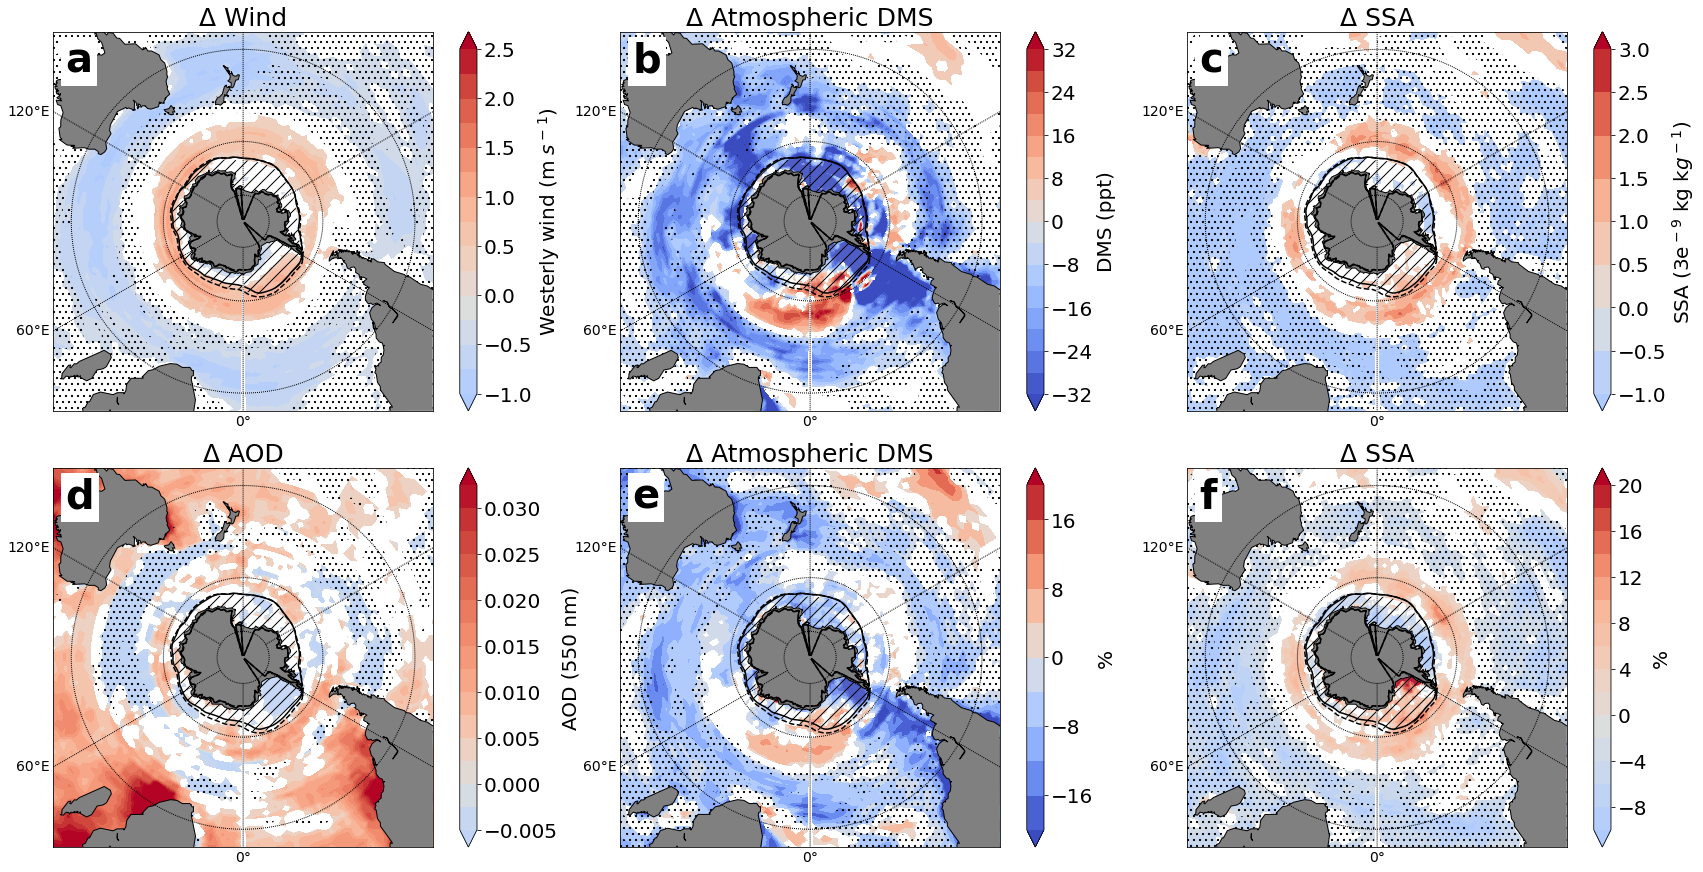

In [229]:

#(rows, columns, position) #  ############################# FIGURE 2 #################################

dataset=[]

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,6):
        for i,l in zip(nums,range(0,8)):
          #  print('models = {}'.format(models[i]))
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])

month='DJF'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Wind','DMS','SSAMMR','AOD','DMS','SSAMMR'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)

data_percentage_rel,data_dot_rel,data_clev_rel,data_shift_rel=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.7, stop=1, name='shifted')
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.4, stop=1, name='shifted') 

shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
clevs_DJF_SSAMMR=np.arange(-10,20+2,2)

clevs_SSA=np.arange(-3,7.5+1.5,1.5)
clevs_SON_Wind=np.arange(-.5,2,.25)
shifted_cmap_Wind_son = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.57, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')

shifted_cmap_SSAMMR_2 = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.65, stop=1, name='shifted')
shifted_cmap_dms_2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.55, stop=0.85, name='shifted')
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')

clevs_SSA=np.arange(-1,3+0.5,0.5)
clevs_DMS=np.arange(-32,32+4,4)
clevs_wind=np.arange(-1,2.5+0.25,0.25)
clevs_dms_2=np.arange(-20,20+4,4)


shift_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shift_wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')



DATA=[data_percentage[0],data_percentage[1],data_percentage[2],data_percentage[3],data_percentage_rel[4],data_percentage_rel[5]]    
DOT=[data_dot[0],data_dot[1],data_dot[2],data_dot[3],data_dot_rel[4],data_dot_rel[5]]
CLEV=[clevs_wind,clevs_DMS,clevs_SSA,data_clev[3],clevs_dms_2,clevs_DJF_SSAMMR]
SHIFT=[shift_wind,shift_dms,ssa_shift,shifted_cmap_AOD,shift_dms,shifted_cmap_SSAMMR_2]


fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=0.05)
n=2; c=3
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['Wind','Atmospheric DMS','SSA','AOD','Atmospheric DMS','SSA'] # Fig 2


units=['Westerly wind (m $s^-$$^1$)','DMS (ppt)','SSA (3e$^-$$^9$ kg k$g^-$$^1$)', 'AOD (550 nm)','%','%']#,'RF-CS (W $m^-$$^2$)']
PERCENTILE = 84
data_file=np.load('/home/ybh10/CMIP6/Indirect/Rel_Diff/Relative_Difference_Indirect_Dataset_DJF_MEDIAN_{}%.npy'.format(PERCENTILE))
data_file_2=np.load('/home/ybh10/CMIP6/Indirect/Abs_Diff/Absolute_Difference_Indirect_Dataset_DJF_MEDIAN_{}%.npy'.format(PERCENTILE))
dot_file=np.load('/home/ybh10/CMIP6/Indirect/Dots/DJF_Spatial_Dots_MEDIAN_{}%.npy'.format(PERCENTILE))


# data_file=np.load('/home/ybh10/CMIP6/Indirect/Relative_Difference_Indirect_Dataset_DJF.npy')
# data_file_2=np.load('/home/ybh10/CMIP6/Indirect/Absolute_Difference_Indirect_Dataset_DJF.npy')
# dot_file=np.load('/home/ybh10/CMIP6/Indirect/DJF_Spatial_Dots.npy')
data_for_fig2=[data_file_2[4],data_file_2[1],data_file_2[3],data_file_2[0],data_file[1],data_file[3]] # 'Wind','DMS','SSA','AOD',DMS,SSA
data_dots_for_fig2=[dot_file[4],dot_file[1],dot_file[3],dot_file[0],dot_file[1],dot_file[3]] # 'Wind','DMS','SSA','AOD',DMS,SSA

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/DJF/Sea_Ice_DJF_model_mean.npy')
sea_ice=np.nanmean(data_in[2],axis=0)
#sea_ice=data_in[2][3]

clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]#,olon.data,olon.data,lonmesh,lonmesh,lonmesh]
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')

data_shift=[shifted_cmap_Wind,shifted_cmap_dms,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,mapy,sig_dot,clev,shift,title,unit,num in  zip(axes,data_for_fig2,data_dots_for_fig2,CLEV,SHIFT,measurement,units,number):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy[-21:],axis=(0))
    sic=np.nanmean(sea_ice[:21],axis=(0))
    sic_new=np.nanmean(sea_ice[-21:],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)

    x,y  = np.meshgrid(lons,lats)

    x, y = map_ax1(x, y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.fillcontinents(color='gray')
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='SSA'!=-1:
        if unit == '%':
            vari=blank_space(mapy,-2,2)
            cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            vari=blank_space(mapy*1e9,-0.5,0.5)
            cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
    else: 
        if title=='Atmospheric DMS':
            if unit == '%':
                vari=blank_space(mapy,-2,2)
                cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-4,4)
                cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            if title=='Wind':
                vari=blank_space(mapy,-0.25,.25)
                cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-0.0025,0.0025)
                cs=map_ax1.contourf(x,y,vari,clev,cmap=shift,extend='both')
#     if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
#         pass
#     else:
    sea_ice_grid=15
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,sea_ice_grid)
    ax.contour(x,y,sic,levels=[sea_ice_grid],linestyles='dashed',colors='black',vmax=10000)
    map_ax1.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,sea_ice_grid)
    ax.contour(x,y,sic_new,levels=[sea_ice_grid],alpha=1,colors='black',vmax=10000)
        
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
#     if title=='Wind' !=-1:
#         var = np.where(sic,np.nan,sig_dot)#mask sea ice
#         [m,n] = np.where(sig_dot==1)
#         z1 = np.zeros(var.shape)
#         z1[m,n]=99
#         cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
#     else:
    var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
    [m,n] = np.where(var==1)
    z1 = np.zeros(var.shape)
    z1[m,n]=99
    cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/Percentile/Fig_2_SEA_ICE_contour_15_zonal_MEDIAN_{}th_Percentile.png".format(PERCENTILE),dpi=600,bbox_inches = 'tight')


In [ ]:
#################################################################################################################################
########################################################## FIGURE 5 Sea Ice ##############################################################
#################################################################################################################################

Direct_or_Indirect='Direct' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))

nums=[0,6,9]
seay=np.zeros((len(nums),75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,len(nums))):
    seay[l]=sea_ice_file[i]
sea_ice=np.nanmean(seay,axis=0)

def sea_ice_bias(data,pre_num,post_num,sea_ice_data):
    sic_new=np.nanmean(sea_ice_data[-post_num:],axis=(0))
#     pre=np.nanmedian(data[:,:pre_num],axis=(1))
    post=np.nanmedian(data[-post_num:],axis=(0))
#     var_old = np.where(sic==0,np.nan,pre)#mask sea ice
    var_new = np.where(sic_new==0,np.nan,post)#mask sea ice
#     model_diff=var_new-var_old
    return post
def for_sea_ice(data,pre_num,post_num,sea_ice_data):
    sic=np.nanmean(data[:pre_num],axis=(0))
    sic_new=np.nanmean(data[-post_num:],axis=(0))
    var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    var_old = np.where(sic==0,np.nan,sic)#mask sea ice
    model_diff=var_new-var_old
    return model_diff

sic=np.nanmean(sea_ice[:21],axis=(0))
sic_new=np.nanmean(sea_ice[-21:],axis=(0))
var_old = np.where(sic==0,np.nan,sic)#mask sea ice
var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
var_diff=var_new-var_old


#data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))
data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))

sea_ice_cmip6_diff=sea_ice_bias(sea_ice,21,21,sea_ice)
model_bias=var_diff-HAD_diff[0]
aod_cmip6_diff=sea_ice_bias(data_file[0],21,21,sea_ice)
dms_cmip6_diff=sea_ice_bias(data_file[1],21,21,sea_ice)
ssa_cmip6_diff=sea_ice_bias(data_file[3],21,21,sea_ice)


data_set=[var_diff,HAD_diff[0],model_bias,data_file[0],data_file[1],data_file[3]]
titles=['CMIP6 Sea Ice','HADISST Ice','CMIP Bias','Oceanic DMS','DMS','Wind']    

fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.1)
n=2; c=3
sh_lat=lats[10:40]

units=['%','Wind','%','%','%','%']#,'RF-CS (W $m^-$$^2$)']

ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
leve=np.arange(-60,0+10,10)
clevs_SON_Sea_ice=np.arange(-40,40+10,10)   
clevs_SON_aod=np.arange(0,30+5,5)   
clevs_SON_dms=np.arange(-10,40+5,5)   
clevs_SON_ssa=np.arange(-1,2+.1,.1)   

clevs=[clevs_SON_Sea_ice,clevs_SON_Sea_ice,clevs_SON_Sea_ice,clevs_SON_Sea_ice,clevs_SON_dms,clevs_SON_ssa]
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.12, stop=.55, name='shifted') 
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 

shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.75, stop=1, name='shifted') 

shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.6, stop=1, name='shifted') 

dats_shifty=[shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice,shifted_cmap_Sea_Ice,shifted_cmap_dms,shifted_cmap_dms]

for ax,mapy,title,clev,shift in zip(axes,data_set,titles,clevs,dats_shifty):
#     sic=np.nanmean(seay_ice[90:111],axis=(0))
#     sic_new=np.nanmean(seay_ice[145::],axis=(0))
   # datas=np.nanmedian(mapy,axis=0)
    #model_contour=np.nanmedian(sea_ice_cmip6_diff,axis=0)
    ax.grid(linestyle='--',alpha=0.5)
#     var_old = np.where(sic==0,np.nan,sic)#mask sea ice
#     var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    ax.set_ylabel('Latitude',fontsize=20)
    y_labels = ['70S','60S']
    y=np.arange(-70,-60+10,10)

    ax.set_yticks(y); ax.set_yticklabels(y_labels,fontsize=15)


    ax.set_title("\u0394 {}".format(title),fontsize=25)
#    cs=ax.contourf(lony,laty,var_new[10:40]-var_old[10:40],cmap=shifts)#,levels=levels)
    if title == 'Oceanic DMS' or title == 'DMS' or title == 'Wind':
        cs=ax.contourf(lons,lats[10:40],np.nanmedian(mapy[45:65,10:40],axis=0), clev,extend='both',cmap=shift)
        ts=ax.contour(lons,lats[10:40],var_diff[10:40],levels=leve)
    else:
        cs=ax.contourf(lons,lats[10:40],mapy[10:40], clev,extend='both',cmap=shift)
        ts=ax.contour(lons,lats[10:40],var_diff[10:40],levels=leve)

    ax.clabel(ts, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.ax.tick_params(labelsize=20)
plt.show()
#plt.savefig("/home/ybh10/CMIP6/Figures/SEA_ICE_{}_{}_Mediandata_Meanice.png".format(Season_type,Direct_or_Indirect),dpi=600,bbox_inches = 'tight')



In [5]:
#(rows, columns, position) #  ############################# FIGURE 3 #################################

dataset=[]

Direct_or_Indirect='Direct' ######## CHANGABLE ATTRIBUTION ########
Season_type='SON'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,6):
        for i,l in zip(nums,range(0,8)):
           # print('models = {}'.format(models[i]))
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
###################################################### FOR ROUTE 3 ##############################
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Ozone','Wind','ODMS','DMS'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
# if month == 'DJF':
#     sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
#     ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
# else:
#     sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
#     ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
data_percentage_rel,data_dot_rel,data_clev_rel,data_shift_rel=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


clevs_dms_djf=np.arange(-20,20+2,2) # DMS
clevs_odms_son=np.arange(-2,2+.2,.2) # oDMS
clevs_SON_Wind=np.arange(-.5,2,.25)
clev_ozone=np.arange(-150,30,30) # oDMS

shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_DJF_ODMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')


DATA=[data_percentage[0],data_percentage[1],data_percentage_rel[2],data_percentage_rel[3]]
DOT=[data_dot[0],data_dot[1],data_dot_rel[2],data_dot_rel[3]]
CLEV=[clev_ozone,clevs_SON_Wind,data_clev_rel[2],data_clev_rel[3]]
SHIFT=[shifted_cmap_Ozone,shifted_cmap_Wind,data_shift_rel[2],shifted_cmap_DJF_DMS]

fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=-0.45)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['Total Column Ozone','Wind','Oceanic DMS','Atmospheric DMS'] # Fig 2

# data_file=np.load('/home/ybh10/CMIP6/Direct/Relative_Difference_Direct_Dataset_{}_Median.npy'.format(Season_type))
# data_file_2=np.load('/home/ybh10/CMIP6/Direct/Absolute_Difference_Direct_Dataset_{}_Median.npy'.format(Season_type))
# dot_file=np.load('/home/ybh10/CMIP6/Direct/{}_Spatial_Dots_MEDIAN.npy'.format('SON'))

PERCENTILE = 84
data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_Direct_Dataset_{}_MEDIAN_{}%.npy'.format(Direct_or_Indirect,Season_type,PERCENTILE))
data_file_2=np.load('/home/ybh10/CMIP6/{}/Abs_Diff/Absolute_Difference_Direct_Dataset_{}_MEDIAN_{}%.npy'.format(Direct_or_Indirect,Season_type,PERCENTILE))
dot_file=np.load('/home/ybh10/CMIP6/{}/Dots/{}_Spatial_Dots_MEDIAN_{}%.npy'.format(Direct_or_Indirect,'SON',PERCENTILE))


# data_file=np.load('/home/ybh10/CMIP6/Direct/Relative_Difference_Direct_Dataset_{}.npy'.format(Season_type))
# data_file_2=np.load('/home/ybh10/CMIP6/Direct/Absolute_Difference_Direct_Dataset_{}.npy'.format(Season_type))
# #wind=np.nanmean(wind[4],axis=0)
# dot_file_wind=np.load('/home/ybh10/CMIP6/Indirect/{}_Spatial_Dots.npy'.format('SON'))[4]
# dot_file=np.load('/home/ybh10/CMIP6/Direct/{}_Spatial_Dots.npy'.format('SON'))
data_for_fig3=[data_file_2[2]*100000,data_file[3],data_file[0],data_file[1]] # 'Wind','DMS','SSA','AOD',DMS,SSA
data_dots_for_fig3=[dot_file[2],dot_file[3],dot_file[0],dot_file[1]] # 'Wind','DMS','SSA','AOD',DMS,SSA

sea_ice_file=np.load('/home/ybh10/CMIP6/Indirect/Sea_Ice/Processed/{}/Sea_Ice_{}_model_mean.npy'.format(Season_type,Season_type))
sea_ice=np.nanmean(sea_ice_file,axis=0)


#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['Total Column Ozone (DU)','Westerly wind (m $s^-$$^1$)','%', '%']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/DMS_SSA.npy'.format(month))
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')


data_shift=[shifted_cmap_Wind,shifted_cmap_dms,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,data_fig,sig_dot,clev,shift,title,unit,num in  zip(axes,data_for_fig3,data_dots_for_fig3,CLEV,SHIFT,measurement,units,number):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(data_fig[-21:],axis=(0))
    sic=np.nanmean(sea_ice[:21],axis=(0))
    sic_new=np.nanmean(sea_ice[-21:],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)


    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 


        
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='Oceanic DMS'!=-1:
        vari=blank_space(mapy,-2.5,2.5)
        cs=ax.contourf(x,y,vari,clev,cmap='coolwarm',extend='both')
        map_ax1.fillcontinents(color='gray')
    else: 
        if title=='Atmospheric DMS':
            vari=blank_space(mapy,-5,5)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            if title=='Wind':
                map_ax1.fillcontinents(color='gray')
                vari=blank_space(mapy,-0.25,0.25)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                map_ax1.fillcontinents(color='gray')
                vari=blank_space(mapy,-20,20)
                print('Ozone')
                cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
#     if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
#         pass
#     else:
    sea_ice_grid=30
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,sea_ice_grid)
    ax.contour(x,y,sic,levels=[sea_ice_grid],linestyles='dashed',colors='black',vmax=10000)
    map_ax1.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)
    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,sea_ice_grid)
    map_ax1.contour(x,y,sic_new,levels=[sea_ice_grid],alpha=1,colors='black',vmax=10000)
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
#     if title=='Wind' !=-1:
#         var = np.where(sic,np.nan,sig_dot)#mask sea ice
#         [m,n] = np.where(sig_dot==1)
#         z1 = np.zeros(var.shape)
#         z1[m,n]=99
#         cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
#     else:
    var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
    [m,n] = np.where(var==1)
    z1 = np.zeros(var.shape)
    z1[m,n]=99
    cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    
plt.show()
#     end
#plt.savefig("/home/ybh10/CMIP6/Figures/Percentile/Fig_3_SEA_ICE_contour_15_zonal_MEDIAN_{}th_Percentile.png".format(PERCENTILE),dpi=600,bbox_inches = 'tight')


NameError: name 'data_for_figure' is not defined

# <b> KEY VALUES TO USE IN PAPER <b>

In [152]:
#######################################################################################################
##################### LOCATION OF WESTERLY JET AND MAXIMUM POSITIONING ################################
#######################################################################################################
#######################################################################################################

Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


# if Direct_or_Indirect == 'Direct':
#     variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
#     if Season_type =='SON':
#         data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
#     else:
#         data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
# else:
#     variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
#     if Season_type =='SON':
#         data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
#     else:
#         data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
#     nums=[0,1,3,5,7,8,9,10]
#     data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
#     model_var=[]
#     for t in range(0,6):
#         for i,l in zip(nums,range(0,8)):
#            # print('models = {}'.format(models[i]))
#             data_in[t,l]=data_for_calculations[t][i]
#             model_var.append(models[i])
            
windy=data_in
winds=np.nanmedian(windy[:,-21:],axis=1)
for i in range (0,8):
    print(model_var[i])
    print(np.nanmax(windy[i,:,20:60]))
    laty=np.where(np.nanmax(windy[i,-21:,20:60])==windy[i,-21:,:60])[1]
    print(lats[laty].data[0])
    print('---------')

UKESM1
2.1829240322113037
-20.625
---------
BCC
1563.1644287109375
-53.125
---------
GFDL-CM4
100.0
-89.375
---------
HadGEM3
5.701004468505744e-08
-16.875
---------
MPI
13.795412063598633
-28.125
---------
MRI-ESM2-0
351.4661865234375
-30.625
---------
NorESM2-LM


IndexError: index 6 is out of bounds for axis 0 with size 6

In [116]:
Direct_or_Indirect='Indirect' ######## CHANGABLE ATTRIBUTION ########
Season_type='DJF'           ######## CHANGABLE ATTRIBUTION ########


if Direct_or_Indirect == 'Direct':
    variables_for_calculation=copy.deepcopy(Direct_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_direct_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
else:
    variables_for_calculation=copy.deepcopy(Indirect_variables_of_interest) ######## CHANGABLE ATTRIBUTION ########
    if Season_type =='SON':
        data_for_calculations= copy.deepcopy(SON_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    else:
        data_for_calculations= copy.deepcopy(DJF_indirect_data_ensemble)                     ######## CHANGABLE ATTRIBUTION ########
    nums=[0,1,3,5,7,8,9,10]
    data_in=np.zeros((6,8,75,144,192)) ;  data_in[:]=np.nan
    model_var=[]
    for t in range(0,6):
        for i,l in zip(nums,range(0,8)):
          #  print('models = {}'.format(models[i]))
            data_in[t,l]=data_for_calculations[t][i]
            model_var.append(models[i])
model_var=model_var[:len(nums)]

seayy=SON_indirect_data_ensemble[2]
nums=[0,1,2,3,4,6,7]
seay=np.zeros((7,75,144,192)) ;  seay[:]=np.nan
model_var=[]
for i,l in zip(nums,range(0,7)):
    seay[l]=seayy[i]

sea_ice=np.nanmean(seay,axis=0)
sic=np.nanmean(sea_ice[:21],axis=(0))

data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))
##data_file=np.load('/home/ybh10/CMIP6/{}/Abs_Diff/Absolute_Difference_{}_Dataset_{}_MEDIAN.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))

n=5
datas=np.nanmedian(data_file[n][-21:],axis=(0)) 
var = np.where(sic>15,np.nan,datas)#mask sea ice
print('{}'.format(variables_for_calculation[n]))
ave_40=np.nanmedian(var[38:41])
print("{0:.3f}".format(ave_40))
ave_60=np.nanmedian(var[22:26])
print("{0:.3f}".format(ave_60))
min_40=np.nanmin(var[38:41])
print("{0:.3f}".format(min_40))
max_60=np.nanmin(var[22:26])
print("{0:.3f}".format(max_60))
print("{0:.3f}".format(np.nanmedian(var[23:40])))


DMS_SSA
-2.914
-5.402
-32.935
-20.864
-2.997


In [152]:
data_file=np.load('/home/ybh10/CMIP6/{}/Abs_Diff/Absolute_Difference_Direct_Dataset_SON_EACH_MODEL.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))
#data_file=np.load('/home/ybh10/CMIP6/{}/Rel_Diff/Relative_Difference_Direct_Dataset_SON_EACH_MODEL.npy'.format(Direct_or_Indirect,Direct_or_Indirect,Season_type))
print(direct_models[1])
n=1
datas=np.nanmedian(data_file[n][1,-21:],axis=(0)) 
var = np.where(sic>15,np.nan,datas)#mask sea ice
print('{}'.format(variables_for_calculation[n]))
ave_40=np.nanmedian(datas[38:41])
print("{}".format(ave_40))
ave_60=np.nanmedian(var[22:24])
print("{}".format(ave_60))
min_40=np.nanmin(datas[38:41])
print("{}".format(min_40))
max_60=np.nanmax(var[22:24])
print("{}".format(max_60))
print("{}".format(np.nanmedian(var[:18])))
np.nanmedian(var[23:40])



NorESM2-LM
DMS
-6.5526275634765625
-7.510919570922852
-59.00835418701172
-1.5984745025634766
-0.2591598331928253


-7.733024597167969

In [188]:
data_in=np.load('/home/ybh10/CMIP6/Indirect/Raw_Data/DJF_Wind_8_21_3_144_192.npy')
import copy
year=np.arange(1995,2015,1)
months=['Dec','Jan','Feb']
windy=copy.deepcopy(data_in)
winds=np.nanmedian(windy[:,:],axis=4)
for i in range (0,8):
#     print(model_var[i])
#     print(np.nanmax(windy[i,:,:,20:60]))
    laty=np.where((windy[i,:,:,20:60]>12.999))[0]
    print('{}'.format(np.shape(laty)))
    #datas.append(laty)
   # print('{}'.format(lats[laty[2][0]].data))
#     print('year = {}'.format(year[laty[0]]))
#     print('month= {}'.format(months[np.int(laty[1][0])]))
#     print('---------')

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
